#Question 3: **Feature Engineering Problem**
##**Dataset**: POWER OVERWHELMING
###**Description**:
This dataset contains results from powerlifting competitions, including features such as age, body weight, and performance in squat, bench press, and deadlift. The data includes raw numerical features, which require extensive feature engineering to build a robust model for predicting performance.
###**Project Task**:
1.	**Goal**: Your task is to predict powerlifting performance based on the various physical and competition-related features provided. The challenge here is to extract meaningful features from the raw data through extensive feature engineering.

2.	**Instructions**:
- Start by exploring the dataset and identifying potential features. This may include creating new features such as ratios (e.g., weight lifted to body weight), interaction terms (e.g., age × weight), or transformations of existing features (e.g., log or polynomial transformations).
- Perform proper handling of missing data, scaling, and normalization.
- Train multiple models (e.g., linear regression, decision trees) on the original features and then on the newly engineered features. Compare the performance between these models.
###**Label** : TotalKg


### Question 3: Mean Absolute Error (MAE) (Best: 0)


In [ ]:
%cd /content/drive/MyDrive/KU/2024-2/데과응/중간과제

/content/drive/MyDrive/KU/2024-2/데과응/중간과제


In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv("./question3-train.csv", encoding='ISO-8859-1')
print(len(train_df))
train_df.head()

<ipython-input-14-3e3ae16f3612>:1: DtypeWarning: Columns (3,7,12,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("./question3-train.csv", encoding='ISO-8859-1')


949569


,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,Bench1Kg,Bench2Kg,...,Place,Dots,Wilks,Glossbrenner,Goodlift,Federation,MeetCountry,MeetTown,MeetName,Sanctioned
0,F,B,Raw,28.5,24-34,24-39,Open,67.3,-40.0,-45.0,...,DQ,NaN,NaN,NaN,NaN,GSF-Belarus,Belarus,Luninets,Bison Power Cup,Yes
1,F,B,Raw,43.5,40-44,40-49,Open,73.2,80.0,85.0,...,1,88.80,86.89,76.50,70.06,GSF-Belarus,Belarus,Luninets,Bison Power Cup,Yes
2,F,B,Raw,26.5,24-34,24-39,Open,60.6,40.0,42.5,...,2,49.57,49.79,43.98,38.42,GSF-Belarus,Belarus,Luninets,Bison Power Cup,Yes
3,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,50.3,32.5,35.0,...,2,43.67,44.76,39.73,34.55,GSF-Belarus,Belarus,Luninets,Bison Power Cup,Yes
4,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,63.7,40.0,42.5,...,1,45.40,45.26,39.96,35.25,GSF-Belarus,Belarus,Luninets,Bison Power Cup,Yes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Test 데이터셋

검증

In [ ]:
df_test = pd.read_excel("./question3-test - features.xlsx")
print(len(df_test))
df_test.head()

99006


,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,Bench1Kg,Bench2Kg,...,Place,Dots,Wilks,Glossbrenner,Goodlift,Federation,MeetCountry,MeetTown,MeetName,Sanctioned
0,M,SBD,Raw,NaN,NaN,NaN,Open,95.4,160.0,167.5,...,2,403.90,398.90,381.44,83.02,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
1,M,SBD,Raw,NaN,NaN,NaN,Open,102.35,140.0,145.0,...,3,387.01,382.99,365.71,79.34,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
2,M,SBD,Raw,28.5,24-34,24-39,Open,100.2,142.5,-147.5,...,4,384.37,380.07,362.99,78.88,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
3,M,SBD,Raw,23.5,24-34,24-39,Open,99.35,120.0,-125.0,...,5,382.70,378.32,361.38,78.57,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
4,M,SBD,Raw,NaN,NaN,NaN,Open,102.25,140.0,-145.0,...,6,378.02,374.08,357.20,77.5,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes


In [ ]:
df_test.columns

Index(['Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass',
       'Division', 'BodyweightKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Best3BenchKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Federation', 'MeetCountry', 'MeetTown', 'MeetName',
       'Sanctioned'],
      dtype='object')

In [ ]:
df_test['id'] = df_test.index
df_test = df_test[['id'] + [col for col in df_test.columns if col != 'id']]

df_test

,id,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,Bench1Kg,...,Place,Dots,Wilks,Glossbrenner,Goodlift,Federation,MeetCountry,MeetTown,MeetName,Sanctioned
0,0,M,SBD,Raw,NaN,NaN,NaN,Open,95.4,160.0,...,2,403.90,398.90,381.44,83.02,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
1,1,M,SBD,Raw,NaN,NaN,NaN,Open,102.35,140.0,...,3,387.01,382.99,365.71,79.34,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
2,2,M,SBD,Raw,28.5,24-34,24-39,Open,100.2,142.5,...,4,384.37,380.07,362.99,78.88,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
3,3,M,SBD,Raw,23.5,24-34,24-39,Open,99.35,120.0,...,5,382.70,378.32,361.38,78.57,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
4,4,M,SBD,Raw,NaN,NaN,NaN,Open,102.25,140.0,...,6,378.02,374.08,357.20,77.5,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.5,20-23,19-23,Juniors,57.95,60.0,...,12,427.87,432.42,382.25,87.47,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes
99002,99002,F,SBD,Raw,22.5,20-23,19-23,Juniors,61.56,60.0,...,13,409.09,409.89,362.04,83.3,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes
99003,99003,F,SBD,Raw,22.5,20-23,19-23,Juniors,61.87,-62.5,...,14,407.82,408.32,360.63,83.02,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes
99004,99004,F,SBD,Raw,22.5,20-23,19-23,Juniors,62.61,75.0,...,15,399.45,399.24,352.56,81.28,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes


In [ ]:
# 'Raw' 또는 'Single-ply' 조건에 해당하는 행들만 선택
mask = ~df_test['Sex'].isin(['M', 'F'])

# 임시 저장을 위한 변수들
temp_goodlift = df_test.loc[mask, 'Glossbrenner'].copy()
temp_glossbrenner = df_test.loc[mask, 'Wilks'].copy()
temp_wilks = df_test.loc[mask, 'Dots'].copy()
temp_dots = df_test.loc[mask, 'Place'].copy()
temp_place = df_test.loc[mask, 'TotalKg'].copy()
temp_totalkg = df_test.loc[mask, 'Best3BenchKg'].copy()
temp_best3benchkg = df_test.loc[mask, 'Bench3Kg'].copy()
temp_bench3kg = df_test.loc[mask, 'Bench2Kg'].copy()
temp_bench2kg = df_test.loc[mask, 'Bench1Kg'].copy()
temp_bench1kg = df_test.loc[mask, 'BodyweightKg'].copy()
temp_bodyweightkg = df_test.loc[mask, 'Division'].copy()
temp_division = df_test.loc[mask, 'BirthYearClass'].copy()
temp_birthyearclass = df_test.loc[mask, 'AgeClass'].copy()
temp_ageclass = df_test.loc[mask, 'Age'].copy()
temp_age = df_test.loc[mask, 'Equipment'].copy()
temp_equipment = df_test.loc[mask, 'Event'].copy()
temp_event = df_test.loc[mask, 'Sex'].copy()

# 값 재할당
df_test.loc[mask, 'Goodlift'] = temp_goodlift
df_test.loc[mask, 'Glossbrenner'] = temp_glossbrenner
df_test.loc[mask, 'Wilks'] = temp_wilks
df_test.loc[mask, 'Dots'] = temp_dots
df_test.loc[mask, 'Place'] = temp_place
df_test.loc[mask, 'TotalKg'] = temp_totalkg
df_test.loc[mask, 'Best3BenchKg'] = temp_best3benchkg
df_test.loc[mask, 'Bench3Kg'] = temp_bench3kg
df_test.loc[mask, 'Bench2Kg'] = temp_bench2kg
df_test.loc[mask, 'Bench1Kg'] = temp_bench1kg
df_test.loc[mask, 'BodyweightKg'] = temp_bodyweightkg
df_test.loc[mask, 'Division'] = temp_division
df_test.loc[mask, 'BirthYearClass'] = temp_birthyearclass
df_test.loc[mask, 'AgeClass'] = temp_ageclass
df_test.loc[mask, 'Age'] = temp_age
df_test.loc[mask, 'Equipment'] = temp_equipment
df_test.loc[mask, 'Event'] = temp_event
df_test.loc[mask, 'Sex'] = 0

<ipython-input-282-7162027d8db7>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[321.63 261.62 410.34 367.83 356.04 347.32 343.37 220.15 296.31 53.96
 156.57 146.5 334.13 377.46 358.86 333.4 329.83 464.19 382.68 385.06
 365.44 319.96 nan 443.49 413.38 372.15 405.64 396.21 336.85 359.04 261.37
 254.9 316.02 373.39 nan 489.78 397.02 356.88 436.71 414.93 418.89 340.74
 309.1 396.3 349.95 443.82 404.56 388.87 74.82 76.38 107.71 108.73 93.88
 39.9 77.58 92.84 104.05 80.79 107.12 102.43 93.95 149.99 122.85 164.63
 162.57 154.49 138.35 185.1 191.49 180.64 139.01 164.98 270.16 331.8 309.1
 385.45 383.83 356.61 329.03 306.24 84.32 123.94 170.59 143.88 110.56
 340.98 387.49 449.85 415.39 362.78 351.74 412.47 440.13 nan 426.19 nan
 nan 350.44 387.19 276.82 369.44 352.66 497.06 480.29 344.75 439.27 361.94
 348.35 478.13 424.27 384.46 nan 487.93 425 397.77 442.46 434.7 75.49
 99.28 97.2 76.12 116.3 90.62 104.32 10

In [ ]:
df_test.dtypes

,0
id,int64
Sex,object
Event,object
Equipment,object
Age,object
AgeClass,object
BirthYearClass,object
Division,object
BodyweightKg,object
Bench1Kg,object


In [ ]:
df_test['BodyweightKg'] = df_test['BodyweightKg'].astype(float)

In [ ]:
# Bench1Kg

plus_values = df_test[df_test['Bench1Kg'].str.contains('\+', na=False)]['Bench1Kg'].unique()
print("'+' 포함된 unique 값들:", plus_values)

'+' 포함된 unique 값들: ['90+' '140+']


In [ ]:
df_test['Bench1Kg'] = df_test['Bench1Kg'].replace('90+', '0')
df_test['Bench1Kg'] = df_test['Bench1Kg'].replace('140+', '1')

In [ ]:
df_test['Bench1Kg'] = df_test['Bench1Kg'].astype(float)

In [ ]:
median_90 = df_test[df_test['BodyweightKg'] >= 90]['Bench1Kg'].median()
median_140 = df_test[df_test['BodyweightKg'] >= 140]['Bench1Kg'].median()


In [ ]:
df_test.loc[df_test['Bench1Kg'] == 0, 'Bench1Kg'] = median_90
df_test.loc[df_test['Bench1Kg'] == 1, 'Bench1Kg'] = median_140

In [ ]:
df_test

,id,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,Bench1Kg,...,Place,Dots,Wilks,Glossbrenner,Goodlift,Federation,MeetCountry,MeetTown,MeetName,Sanctioned
0,0,M,SBD,Raw,NaN,NaN,NaN,Open,95.40,160.0,...,2,403.9,398.90,381.44,83.02,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
1,1,M,SBD,Raw,NaN,NaN,NaN,Open,102.35,140.0,...,3,387.01,382.99,365.71,79.34,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
2,2,M,SBD,Raw,28.5,24-34,24-39,Open,100.20,142.5,...,4,384.37,380.07,362.99,78.88,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
3,3,M,SBD,Raw,23.5,24-34,24-39,Open,99.35,120.0,...,5,382.7,378.32,361.38,78.57,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
4,4,M,SBD,Raw,NaN,NaN,NaN,Open,102.25,140.0,...,6,378.02,374.08,357.20,77.5,KNKF-SP,Netherlands,Tilburg,DRC Cup,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.5,20-23,19-23,Juniors,57.95,60.0,...,12,427.87,432.42,382.25,87.47,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes
99002,99002,F,SBD,Raw,22.5,20-23,19-23,Juniors,61.56,60.0,...,13,409.09,409.89,362.04,83.3,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes
99003,99003,F,SBD,Raw,22.5,20-23,19-23,Juniors,61.87,-62.5,...,14,407.82,408.32,360.63,83.02,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes
99004,99004,F,SBD,Raw,22.5,20-23,19-23,Juniors,62.61,75.0,...,15,399.45,399.24,352.56,81.28,FFForce,France,Villepinte,Championnats de France Jeunes de Force Athl챕tique,Yes


In [ ]:
# Age

# Step 1: Age 열의 모든 값을 순회하면서 처리
def process_age(age):
    # NaN 값 체크
    if pd.isna(age):
        return 0  # NaN을 0으로 반환

    age = str(age)  # 값을 문자열로 변환하여 처리
    # 1) ".5"로 끝날 시 ".5"를 삭제
    if age.endswith(".5"):
        age = age[:-2]
    # 2) "-"가 포함된 경우, 앞뒤 숫자를 추출하여 중앙값으로 대체
    elif "-" in age:
        start, end = map(int, age.split("-"))
        age = (start + end) // 2  # 중앙값 계산
    else:
        # 값이 정수 또는 소수인 경우 처리
        age = int(float(age))  # float 변환 후 정수형으로 변환

    return age

# apply 함수를 사용하여 변환
df_test["Age"] = df_test["Age"].apply(process_age)

In [ ]:
df_test['Age'] = df_test['Age'].astype(int)

In [ ]:
class_counts_sex = df_test["Sex"].value_counts()
print(class_counts_sex)
print()

Sex
M    69540
F    28559
0      907
Name: count, dtype: int64



In [ ]:
# df_test.to_csv('./test_mid_processed.csv')

In [ ]:
# df_test = pd.read_csv('./test_mid_processed.csv')

In [ ]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [ ]:
# Sex가 0인 애들 RandomForestClassifier로 M or F classify

from sklearn.ensemble import RandomForestClassifier

def predict_sex(df):
    # 원본 데이터프레임에서 Sex가 0인 것과 아닌 것 분리
    df_sex_0 = df.loc[df['Sex'] == 0]  # test dataset
    df_sex_not_0 = df.loc[df['Sex'] != 0]

    # 예측에 사용할 특성
    sCol = ["Age", "BodyweightKg", "Bench1Kg", "Bench2Kg", "Bench3Kg", "Best3BenchKg"]

    # RandomForest 모델 학습
    catModel_sex = CatBoostClassifier(iterations=100, learning_rate=0.08, early_stopping_rounds = 10)
    catModel_sex.fit(df_sex_not_0[sCol], df_sex_not_0["Sex"])

    # Sex가 0인 데이터 예측
    sex_0_pred = catModel_sex.predict(df_sex_0[sCol])

    # 예측 결과를 원본 데이터프레임에 반영
    df_result = df.copy()
    df_result.loc[df_result['Sex'] == 0, 'Sex'] = sex_0_pred

    # 원본 데이터프레임과 결과 데이터프레임의 인덱스가 동일한지 확인
    is_same_order = df.index.equals(df_result.index)
    print("Is the data order the same?:", is_same_order)

    return df_result

# 실행
df_test = predict_sex(df_test)

0:	learn: 0.6437362	total: 84.3ms	remaining: 8.34s
1:	learn: 0.6031405	total: 118ms	remaining: 5.76s
2:	learn: 0.5675561	total: 152ms	remaining: 4.9s
3:	learn: 0.5362104	total: 184ms	remaining: 4.41s
4:	learn: 0.5088589	total: 221ms	remaining: 4.2s
5:	learn: 0.4850657	total: 247ms	remaining: 3.87s
6:	learn: 0.4636515	total: 271ms	remaining: 3.6s
7:	learn: 0.4447958	total: 299ms	remaining: 3.43s
8:	learn: 0.4273667	total: 315ms	remaining: 3.19s
9:	learn: 0.4124295	total: 333ms	remaining: 3s
10:	learn: 0.3985198	total: 347ms	remaining: 2.81s
11:	learn: 0.3863082	total: 364ms	remaining: 2.67s
12:	learn: 0.3753889	total: 378ms	remaining: 2.53s
13:	learn: 0.3658778	total: 392ms	remaining: 2.41s
14:	learn: 0.3570281	total: 409ms	remaining: 2.31s
15:	learn: 0.3490434	total: 423ms	remaining: 2.22s
16:	learn: 0.3411558	total: 436ms	remaining: 2.13s
17:	learn: 0.3347945	total: 450ms	remaining: 2.05s
18:	learn: 0.3286869	total: 465ms	remaining: 1.98s
19:	learn: 0.3231016	total: 479ms	remaining: 1

In [ ]:
class_counts_sex = df_test["Sex"].value_counts()
print("최종 결과:")
print(class_counts_sex)

최종 결과:
Sex
M    69978
F    29028
Name: count, dtype: int64


In [ ]:
drop_features = ['AgeClass', 'BirthYearClass', 'Division', 'Federation', 'MeetCountry', 'MeetTown', 'MeetName' ,'Sanctioned']

In [ ]:
df_test = df_test.drop(drop_features, axis = 1)

print(df_test.shape)
print(df_test.columns)

(99006, 16)
Index(['id', 'Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'TotalKg', 'Place', 'Dots',
       'Wilks', 'Glossbrenner', 'Goodlift'],
      dtype='object')


In [ ]:
df_train = pd.read_csv("./question-3_JH_processed.csv")
print(df_train.shape)
df_train.head()

<ipython-input-303-8d0f8cbd4bc1>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./question-3_JH_processed.csv")


(885567, 15)


,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,F,B,Raw,43,73.2,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06
1,F,B,Raw,26,60.6,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42
2,F,B,Raw,19,50.3,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55
3,F,B,Raw,19,63.7,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25
4,M,B,Raw,30,82.0,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97


In [ ]:
(df_test.index != df_test['id']).sum()

0

### 나이 리그레션

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00


In [ ]:
df_test[df_test['Dots'].isna()]

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
15,15,M,SBD,Raw,0,110.50,125.0,132.5,-135.0,132.5,NaN,DQ,NaN,NaN,NaN,NaN
18,18,M,SBD,Raw,0,101.70,135.0,-142.5,142.5,142.5,NaN,DQ,NaN,NaN,NaN,NaN
35,35,F,B,Single-ply,0,71.55,-105.0,-110.0,-110.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
51,51,M,B,Single-ply,0,82.15,-165.0,-165.0,-165.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
65,65,M,B,Single-ply,0,97.90,-155.0,-155.0,-155.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98836,98836,F,SBD,Raw,17,61.94,-62.5,62.5,-65.0,62.5,NaN,DQ,NaN,NaN,NaN,NaN
98889,98889,M,SBD,Raw,16,64.77,90.0,-95.0,-95.0,90.0,NaN,DQ,NaN,NaN,NaN,NaN
98908,98908,M,SBD,Raw,17,74.00,-112.5,-112.5,-112.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN
98920,98920,M,SBD,Raw,16,82.29,-132.5,-132.5,-132.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN


In [ ]:
label_encoder = LabelEncoder()

df_train.loc[:,'Sex_label'] = label_encoder.fit_transform(df_train['Sex'])
df_test.loc[:,'Sex_label'] = label_encoder.transform(df_test['Sex'])

print(df_train['Sex'].value_counts())
print(df_train['Sex_label'].value_counts())

print(df_test['Sex'].value_counts())
print(df_test['Sex_label'].value_counts())

Sex
M     496435
F     389051
Mx        81
Name: count, dtype: int64
Sex_label
1    496435
0    389051
2        81
Name: count, dtype: int64
Sex
M    69978
F    29028
Name: count, dtype: int64
Sex_label
1    69978
0    29028
Name: count, dtype: int64


In [ ]:
(df_test['id'] != df_test['id']).sum()

0

In [ ]:
def predict_age(data):

    df_age_0 = data.loc[data['Age'] == 0] # test dataset
    df_age_not_0 = data.loc[data['Age'] != 0] # train dataset

    # df_age_0.loc[:,'Sex_label'] = label_encoder.transform(df_age_0['Sex'])
    # df_age_not_0.loc[:,'Sex_label'] = label_encoder.transform(df_age_not_0['Sex'])

    aCol = ['Sex_label', 'BodyweightKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Dots',
       'Wilks', 'Glossbrenner']

    catModel_age = CatBoostRegressor(iterations=100, learning_rate=0.08, early_stopping_rounds = 10,
                                     cat_features=['Sex_label'])
    catModel_age.fit(df_age_not_0[aCol], df_age_not_0["Age"])

    # prediction
    Age_0_pred = catModel_age.predict(df_age_0[aCol])

    data_result = data.copy()
    data_result.loc[data_result['Age'] == 0, 'Age'] = Age_0_pred

    # 원본 데이터프레임과 결과 데이터프레임의 인덱스가 동일한지 확인
    if 'id' in data.columns:
        print("인덱스 다른 데이터 갯수:", (data['id'] != data_result['id']).sum())

    return data_result

In [ ]:
df_train = predict_age(df_train)
df_train.drop(['Sex_label'], axis=1, inplace=True)
df_train

0:	learn: 13.4671304	total: 175ms	remaining: 17.3s
1:	learn: 13.3817555	total: 352ms	remaining: 17.3s
2:	learn: 13.3071403	total: 506ms	remaining: 16.4s
3:	learn: 13.2431649	total: 668ms	remaining: 16s
4:	learn: 13.1864611	total: 820ms	remaining: 15.6s
5:	learn: 13.1340265	total: 962ms	remaining: 15.1s
6:	learn: 13.0903491	total: 1.13s	remaining: 15s
7:	learn: 13.0536263	total: 1.4s	remaining: 16.1s
8:	learn: 13.0192257	total: 1.66s	remaining: 16.8s
9:	learn: 12.9896269	total: 1.98s	remaining: 17.8s
10:	learn: 12.9636504	total: 2.26s	remaining: 18.3s
11:	learn: 12.9387305	total: 2.59s	remaining: 19s
12:	learn: 12.9176277	total: 2.88s	remaining: 19.3s
13:	learn: 12.9000001	total: 3.15s	remaining: 19.4s
14:	learn: 12.8837507	total: 3.42s	remaining: 19.4s
15:	learn: 12.8702174	total: 3.69s	remaining: 19.4s
16:	learn: 12.8572522	total: 4.01s	remaining: 19.6s
17:	learn: 12.8434544	total: 4.33s	remaining: 19.7s
18:	learn: 12.8332629	total: 4.64s	remaining: 19.8s
19:	learn: 12.8234162	total: 

<ipython-input-308-71190ea98261>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[32.71640058 33.7896407  34.73414096 ... 25.06592178 25.38983935
 25.14727982]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_result.loc[data_result['Age'] == 0, 'Age'] = Age_0_pred


,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,F,B,Raw,43.00000,73.20,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06
1,F,B,Raw,26.00000,60.60,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42
2,F,B,Raw,19.00000,50.30,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55
3,F,B,Raw,19.00000,63.70,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25
4,M,B,Raw,30.00000,82.00,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885562,M,SBD,Raw,31.00000,67.50,107.5,112.5,-115.0,112.5,452.5,10,348.76,348.88,338.66,69.71
885563,M,SBD,Raw,25.14728,72.70,95.0,102.5,-107.5,102.5,442.5,11,323.96,322.37,311.91,65.56
885564,M,SBD,Raw,29.00000,82.15,145.0,152.5,155.0,155.0,675.0,1,458.35,453.34,436.29,93.93
885565,M,SBD,Raw,31.00000,81.35,137.5,-142.5,-142.5,137.5,615.0,2,419.95,415.51,400.06,86.00


In [ ]:
df_test['Dots'] = df_test['Dots'].astype(float)
df_test['Goodlift'] = df_test['Goodlift'].astype(float)
df_test.dtypes

,0
id,int64
Sex,object
Event,object
Equipment,object
Age,int64
BodyweightKg,float64
Bench1Kg,float64
Bench2Kg,float64
Bench3Kg,float64
Best3BenchKg,float64


In [ ]:
df_test = predict_age(df_test)
df_test.drop(['Sex_label'], axis=1, inplace=True)
df_test

0:	learn: 13.8975600	total: 17.6ms	remaining: 1.74s
1:	learn: 13.8177865	total: 31.5ms	remaining: 1.54s
2:	learn: 13.7447617	total: 45.7ms	remaining: 1.48s
3:	learn: 13.6831316	total: 60.1ms	remaining: 1.44s
4:	learn: 13.6286686	total: 74.3ms	remaining: 1.41s
5:	learn: 13.5811172	total: 88.7ms	remaining: 1.39s
6:	learn: 13.5391734	total: 103ms	remaining: 1.36s
7:	learn: 13.5031258	total: 117ms	remaining: 1.35s
8:	learn: 13.4714664	total: 131ms	remaining: 1.32s
9:	learn: 13.4443904	total: 146ms	remaining: 1.31s
10:	learn: 13.4183455	total: 160ms	remaining: 1.29s
11:	learn: 13.3952701	total: 177ms	remaining: 1.3s
12:	learn: 13.3763422	total: 192ms	remaining: 1.28s
13:	learn: 13.3606510	total: 211ms	remaining: 1.3s
14:	learn: 13.3452209	total: 225ms	remaining: 1.27s
15:	learn: 13.3309364	total: 238ms	remaining: 1.25s
16:	learn: 13.3190964	total: 252ms	remaining: 1.23s
17:	learn: 13.3069247	total: 268ms	remaining: 1.22s
18:	learn: 13.2931163	total: 282ms	remaining: 1.2s
19:	learn: 13.28206

<ipython-input-308-71190ea98261>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[32.94363994 31.66880651 30.79526969 ... 33.32563066 32.31625163
 29.40511547]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_result.loc[data_result['Age'] == 0, 'Age'] = Age_0_pred


인덱스 다른 데이터 갯수: 0


,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,0,M,SBD,Raw,32.943640,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02
1,1,M,SBD,Raw,31.668807,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34
2,2,M,SBD,Raw,28.000000,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88
3,3,M,SBD,Raw,23.000000,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57
4,4,M,SBD,Raw,30.795270,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.000000,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47
99002,99002,F,SBD,Raw,22.000000,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30
99003,99003,F,SBD,Raw,22.000000,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02
99004,99004,F,SBD,Raw,22.000000,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28


In [ ]:
df_train['Age'] = df_train['Age'].round()
df_train

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885562,M,SBD,Raw,31.0,67.50,107.5,112.5,-115.0,112.5,452.5,10,348.76,348.88,338.66,69.71
885563,M,SBD,Raw,25.0,72.70,95.0,102.5,-107.5,102.5,442.5,11,323.96,322.37,311.91,65.56
885564,M,SBD,Raw,29.0,82.15,145.0,152.5,155.0,155.0,675.0,1,458.35,453.34,436.29,93.93
885565,M,SBD,Raw,31.0,81.35,137.5,-142.5,-142.5,137.5,615.0,2,419.95,415.51,400.06,86.00


In [ ]:
df_test['Age'] = df_test['Age'].round()
df_test

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,0,M,SBD,Raw,33.0,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02
1,1,M,SBD,Raw,32.0,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34
2,2,M,SBD,Raw,28.0,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88
3,3,M,SBD,Raw,23.0,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57
4,4,M,SBD,Raw,31.0,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28


In [ ]:
df_train = df_train[~(df_train['BodyweightKg'].isna() & df_train['Best3BenchKg'].isna())]
df_train

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885562,M,SBD,Raw,31.0,67.50,107.5,112.5,-115.0,112.5,452.5,10,348.76,348.88,338.66,69.71
885563,M,SBD,Raw,25.0,72.70,95.0,102.5,-107.5,102.5,442.5,11,323.96,322.37,311.91,65.56
885564,M,SBD,Raw,29.0,82.15,145.0,152.5,155.0,155.0,675.0,1,458.35,453.34,436.29,93.93
885565,M,SBD,Raw,31.0,81.35,137.5,-142.5,-142.5,137.5,615.0,2,419.95,415.51,400.06,86.00


In [ ]:
# 'NS'와 'DQ'인 데이터를 필터링
df_test_ns_dq = df_test[df_test['Place'].isin(['NS', 'DQ'])]

# 'NS'와 'DQ'가 아닌 데이터를 필터링
df_test_other = df_test[~df_test['Place'].isin(['NS', 'DQ'])]

# 분리된 두 DataFrame을 확인
print("NS와 DQ 데이터:")
df_test_ns_dq

NS와 DQ 데이터:


,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
15,15,M,SBD,Raw,36.0,110.50,125.0,132.5,-135.0,132.5,NaN,DQ,NaN,NaN,NaN,NaN
18,18,M,SBD,Raw,36.0,101.70,135.0,-142.5,142.5,142.5,NaN,DQ,NaN,NaN,NaN,NaN
35,35,F,B,Single-ply,32.0,71.55,-105.0,-110.0,-110.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
51,51,M,B,Single-ply,38.0,82.15,-165.0,-165.0,-165.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
65,65,M,B,Single-ply,39.0,97.90,-155.0,-155.0,-155.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98836,98836,F,SBD,Raw,17.0,61.94,-62.5,62.5,-65.0,62.5,NaN,DQ,NaN,NaN,NaN,NaN
98889,98889,M,SBD,Raw,16.0,64.77,90.0,-95.0,-95.0,90.0,NaN,DQ,NaN,NaN,NaN,NaN
98908,98908,M,SBD,Raw,17.0,74.00,-112.5,-112.5,-112.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN
98920,98920,M,SBD,Raw,16.0,82.29,-132.5,-132.5,-132.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN


In [ ]:
print("\nNS와 DQ가 아닌 데이터:")
df_test_other


NS와 DQ가 아닌 데이터:


,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
0,0,M,SBD,Raw,33.0,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02
1,1,M,SBD,Raw,32.0,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34
2,2,M,SBD,Raw,28.0,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88
3,3,M,SBD,Raw,23.0,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57
4,4,M,SBD,Raw,31.0,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28


In [ ]:
import pandas as pd
df_train = pd.read_csv('./question-3_train.csv')
df_train.drop('Unnamed: 0', axis=1, inplace=True)


df_test_other = pd.read_csv('./question-3_test_other.csv')
df_test_other.drop('Unnamed: 0', axis=1, inplace=True)

df_test_ns_dq = pd.read_csv('./question-3_test_ns_dq.csv')
df_test_ns_dq.drop('Unnamed: 0', axis=1, inplace=True)


<ipython-input-23-1f29073b73e3>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('./question-3_train.csv')


In [ ]:
len(df_test_ns_dq)

4869

In [ ]:
df_test_ns_dq[(df_test_ns_dq['Bench1Kg'] < 0)&(df_test_ns_dq['Bench2Kg'] < 0)&(df_test_ns_dq['Bench3Kg'] < 0)]

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift
2,35,F,B,Single-ply,32.0,71.55,-105.0,-110.0,-110.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
3,51,M,B,Single-ply,38.0,82.15,-165.0,-165.0,-165.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
4,65,M,B,Single-ply,39.0,97.90,-155.0,-155.0,-155.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
6,115,F,SBD,Raw,23.0,83.74,-65.0,-65.0,-65.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
8,168,M,B,Raw,17.0,73.04,-117.5,-125.5,-125.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,98801,F,SBD,Raw,17.0,47.00,-55.0,-55.0,-55.0,NaN,NaN,DQ,NaN,NaN,NaN,NaN
4863,98818,F,SBD,Raw,16.0,55.65,-50.0,-52.5,-52.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN
4866,98908,M,SBD,Raw,17.0,74.00,-112.5,-112.5,-112.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN
4867,98920,M,SBD,Raw,16.0,82.29,-132.5,-132.5,-132.5,NaN,NaN,DQ,NaN,NaN,NaN,NaN


In [ ]:
from xgboost import XGBRegressor


In [ ]:
df_train.loc[:,'Sex_label'] = label_encoder.transform(df_train['Sex'])
df_test_other.loc[:,'Sex_label'] = label_encoder.transform(df_test_other['Sex'])

print(df_train['Sex'].value_counts())
print(df_train['Sex_label'].value_counts())

print(df_test_other['Sex'].value_counts())
print(df_test_other['Sex_label'].value_counts())

Sex
M     496313
F     388971
Mx        81
Name: count, dtype: int64
Sex_label
1    496313
0    388971
2        81
Name: count, dtype: int64
Sex
M    66056
F    28081
Name: count, dtype: int64
Sex_label
1    66056
0    28081
Name: count, dtype: int64


<ipython-input-318-c35f2ec4e7ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,'Sex_label'] = label_encoder.transform(df_train['Sex'])
<ipython-input-318-c35f2ec4e7ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_other.loc[:,'Sex_label'] = label_encoder.transform(df_test_other['Sex'])


In [ ]:
def predict_bodyweight(data):
    # BodyweightKg이 0인 데이터는 테스트 세트, 0이 아닌 데이터는 훈련 세트로 구분
    df_bw_0 = data.loc[data['BodyweightKg'].isna()]  # test dataset
    df_bw_not_0 = data.loc[~data['BodyweightKg'].isna()]  # train dataset

    print(df_bw_0.shape)
    print(df_bw_not_0.shape)

    # Sex 열을 라벨 인코딩하여 추가
    # df_bw_0.loc[:, 'Sex_label'] = label_encoder.transform(df_bw_0['Sex'])
    # df_bw_not_0.loc[:, 'Sex_label'] = label_encoder.transform(df_bw_not_0['Sex'])

    # 학습에 사용할 열 목록
    aCol = ['Sex_label', 'Age', 'Best3BenchKg']

    # 랜덤 포레스트 회귀 모델 초기화 및 학습
    catModel_bodyweight = CatBoostRegressor(iterations=100, learning_rate=0.08, early_stopping_rounds = 10,
                                     cat_features=['Sex_label'])

    catModel_bodyweight.fit(df_bw_not_0[aCol], df_bw_not_0["BodyweightKg"])

    # 예측 수행
    Bodyweight_0_pred = catModel_bodyweight.predict(df_bw_0[aCol])

    data_result = data.copy()
    data_result.loc[data_result['BodyweightKg'].isna(), 'BodyweightKg'] = Bodyweight_0_pred

    # 원본 데이터프레임과 결과 데이터프레임의 인덱스가 동일한지 확인
    if 'id' in data.columns:
        is_same_order = data['id'].equals(data_result['id'])
        print("Is the data order the same?:", is_same_order)

    return data_result

In [ ]:
df_train = predict_bodyweight(df_train)
# df_train.drop(['Sex_label'], axis=1, inplace=True)
df_train

(1394, 16)
(883971, 16)
0:	learn: 22.0398156	total: 230ms	remaining: 22.8s
1:	learn: 21.4410436	total: 415ms	remaining: 20.3s
2:	learn: 20.9186490	total: 604ms	remaining: 19.5s
3:	learn: 20.4609886	total: 769ms	remaining: 18.4s
4:	learn: 20.0572615	total: 943ms	remaining: 17.9s
5:	learn: 19.7075357	total: 1.11s	remaining: 17.4s
6:	learn: 19.4066858	total: 1.3s	remaining: 17.3s
7:	learn: 19.1350364	total: 1.47s	remaining: 16.9s
8:	learn: 18.9034024	total: 1.65s	remaining: 16.7s
9:	learn: 18.6997420	total: 1.81s	remaining: 16.3s
10:	learn: 18.5227110	total: 1.98s	remaining: 16s
11:	learn: 18.3694903	total: 2.15s	remaining: 15.8s
12:	learn: 18.2359846	total: 2.35s	remaining: 15.7s
13:	learn: 18.1175461	total: 2.52s	remaining: 15.5s
14:	learn: 18.0171278	total: 2.7s	remaining: 15.3s
15:	learn: 17.9289539	total: 2.86s	remaining: 15s
16:	learn: 17.8542959	total: 3.04s	remaining: 14.8s
17:	learn: 17.7889076	total: 3.21s	remaining: 14.6s
18:	learn: 17.7323814	total: 3.4s	remaining: 14.5s
19:	l

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Sex_label
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06,0
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42,0
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55,0
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25,0
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885562,M,SBD,Raw,31.0,67.50,107.5,112.5,-115.0,112.5,452.5,10,348.76,348.88,338.66,69.71,1
885563,M,SBD,Raw,25.0,72.70,95.0,102.5,-107.5,102.5,442.5,11,323.96,322.37,311.91,65.56,1
885564,M,SBD,Raw,29.0,82.15,145.0,152.5,155.0,155.0,675.0,1,458.35,453.34,436.29,93.93,1
885565,M,SBD,Raw,31.0,81.35,137.5,-142.5,-142.5,137.5,615.0,2,419.95,415.51,400.06,86.00,1


In [ ]:
def test_predict_bodyweight(df_train, df_test):
    # 학습 데이터 구성: df_train 전체와 df_test에서 BodyweightKg가 NaN이 아닌 데이터
    df_train_combined = pd.concat([df_train, df_test.loc[~df_test['BodyweightKg'].isna()]])

    # 예측 대상 구성: df_test에서 BodyweightKg가 NaN인 데이터
    df_test_nan = df_test.loc[df_test['BodyweightKg'].isna()]

    # 학습에 사용할 열 목록
    aCol = ['Sex_label', 'Age', 'Best3BenchKg']

    # XGBoost 회귀 모델 초기화 및 학습
    catModel_bodyweight = CatBoostRegressor(iterations=100, learning_rate=0.08, early_stopping_rounds = 10,
                                     cat_features=['Sex_label'])

    catModel_bodyweight.fit(df_train_combined[aCol], df_train_combined["BodyweightKg"])

    # 예측 수행
    Bodyweight_0_pred = catModel_bodyweight.predict(df_test_nan[aCol])

    # 예측된 값을 원래 df_test NaN 위치에 반영
    df_test_result = df_test.copy()
    df_test_result.loc[df_test_result['BodyweightKg'].isna(), 'BodyweightKg'] = Bodyweight_0_pred

    # 원본 데이터프레임과 결과 데이터프레임의 인덱스가 동일한지 확인
    if 'id' in df_test.columns:
        is_same_order = df_test['id'].equals(df_test_result['id'])
        print("Is the data order the same?:", is_same_order)

    return df_test_result

In [ ]:
df_test_other = test_predict_bodyweight(df_train, df_test_other)
# df_test_other.drop(['Sex_label'], axis=1, inplace=True)
df_test_other

0:	learn: 21.9958814	total: 425ms	remaining: 42.1s
1:	learn: 21.4069076	total: 821ms	remaining: 40.2s
2:	learn: 20.8881189	total: 1.19s	remaining: 38.5s
3:	learn: 20.4283090	total: 1.56s	remaining: 37.4s
4:	learn: 20.0248074	total: 1.81s	remaining: 34.4s
5:	learn: 19.6728251	total: 2s	remaining: 31.4s
6:	learn: 19.3664734	total: 2.19s	remaining: 29.1s
7:	learn: 19.1005136	total: 2.38s	remaining: 27.4s
8:	learn: 18.8731886	total: 2.58s	remaining: 26.1s
9:	learn: 18.6716961	total: 2.77s	remaining: 24.9s
10:	learn: 18.4913160	total: 2.95s	remaining: 23.9s
11:	learn: 18.3427555	total: 3.14s	remaining: 23s
12:	learn: 18.2107873	total: 3.33s	remaining: 22.3s
13:	learn: 18.0962449	total: 3.54s	remaining: 21.7s
14:	learn: 17.9968100	total: 3.72s	remaining: 21.1s
15:	learn: 17.9107430	total: 3.93s	remaining: 20.6s
16:	learn: 17.8366236	total: 4.12s	remaining: 20.1s
17:	learn: 17.7690435	total: 4.31s	remaining: 19.6s
18:	learn: 17.7092034	total: 4.49s	remaining: 19.1s
19:	learn: 17.6583917	total

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Sex_label
0,0,M,SBD,Raw,33.0,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02,1
1,1,M,SBD,Raw,32.0,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34,1
2,2,M,SBD,Raw,28.0,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88,1
3,3,M,SBD,Raw,23.0,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57,1
4,4,M,SBD,Raw,31.0,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47,0
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30,0
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02,0
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28,0


In [ ]:
df_train.to_csv('./question3_train_mid_1.csv', index=False)
df_test_other.to_csv('./question3_test_noDQNS_mid_1.csv', index=False)

## 피처 엔지니어링

In [ ]:
# df_processed5 = pd.read_csv("./question-3_mid_processed_5.csv")
# print(len(df_processed5))
# df_processed5.head()

### Dots

In [ ]:
# Dots

import numpy as np
import pandas as pd

def poly4(A, B, C, D, E, x):
    """Horner's Method를 사용한 4차 다항식 계산"""
    x2 = x * x
    even = (A * x2 + C)  # Ax^2 + C
    odd = (B * x2 + D)   # Bx^2 + D
    even = even * x2 + E  # Ax^4 + Cx^2 + E
    return odd * x + even  # Ax^4 + Bx^3 + Cx^2 + Dx + E

def dots_coefficient_men(bodyweightkg):
    """남성에 대한 dots 계수 계산"""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        A = -0.0000010930
        B = 0.0007391293
        C = -0.1918759221
        D = 24.0900756
        E = -307.75076

        # clamp 함수처럼 범위 제한
        adjusted_weight = min(max(40.0, bodyweightkg), 210.0)

        result = 500.0 / poly4(A, B, C, D, E, adjusted_weight)
        return result if result > 0 else np.nan
    except:
        return np.nan

def dots_coefficient_women(bodyweightkg):
    """여성에 대한 dots 계수 계산"""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        A = -0.0000010706
        B = 0.0005158568
        C = -0.1126655495
        D = 13.6175032
        E = -57.96288

        # clamp 함수처럼 범위 제한
        adjusted_weight = min(max(40.0, bodyweightkg), 150.0)

        result = 500.0 / poly4(A, B, C, D, E, adjusted_weight)
        return result if result > 0 else np.nan
    except:
        return np.nan

def dots_coefficient(sex, bodyweight):
    try:
        # null 체크
        if pd.isna(sex) or pd.isna(bodyweight):
            return np.nan

        # 값 변환
        bodyweight = float(bodyweight)

        # 0 체크
        if bodyweight == 0:
            return np.nan

        # 성별에 따라 적절한 계수 함수 선택
        if sex in ["M", "Mx"]:
            coefficient = dots_coefficient_men(bodyweight)
            return coefficient
        elif sex == "F":
            coefficient = dots_coefficient_women(bodyweight)
            return coefficient
        else:
            return np.nan

    except:
        return np.nan


def dots_score_define(coefficient, total):
    """Dots 점수를 계산하는 함수."""
    try:
        if pd.isna(total):
            return np.nan

        total = float(total)

        # 0 체크
        if total == 0:
            return np.nan

        #coefficient = dots_coefficient(sex, bodyweight)

        # coefficient가 NaN인 경우 체크
        if pd.isna(coefficient):
            return np.nan

        # 최종 Dots 점수 계산
        result = coefficient * total
        return result if result > 0 else np.nan
    except:
        return np.nan

### Wilks

In [ ]:
# Wilks

import numpy as np
import pandas as pd

def poly5(F, E, D, C, B, A, x):
    """Horner's Method를 사용한 5차 다항식 계산
    ax^5 + bx^4 + cx^3 + dx^2 + ex + f 계산
    """
    x2 = x * x
    odd = (F * x2 + D)    # Fx^2 + D
    even = (E * x2 + C)   # Ex^2 + C
    odd = odd * x2 + B    # Fx^4 + Dx^2 + B
    even = even * x2 + A  # Ex^4 + Cx^2 + A
    return odd * x + even # Fx^5 + Ex^4 + Dx^3 + Cx^2 + Bx + A

def wilks_coefficient_men(bodyweightkg):
    """남성에 대한 Wilks 계수 계산"""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        # 다항식 계수 (상수항부터)
        A = -216.0475144
        B = 16.2606339
        C = -0.002388645
        D = -0.00113732
        E = 7.01863E-06
        F = -1.291E-08

        # clamp 함수처럼 범위 제한
        adjusted_weight = min(max(40.0, bodyweightkg), 201.9)

        # 계수 순서 변경하여 호출 (5차항부터)
        result = 500.0 / poly5(F, E, D, C, B, A, adjusted_weight)
        return result if result > 0 else np.nan
    except:
        return np.nan

def wilks_coefficient_women(bodyweightkg):
    """여성에 대한 Wilks 계수 계산"""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        # 다항식 계수
        A = 594.31747775582
        B = -27.23842536447
        C = 0.82112226871
        D = -0.00930733913
        E = 0.00004731582
        F = -0.00000009054

        # clamp 함수처럼 범위 제한
        adjusted_weight = min(max(26.51, bodyweightkg), 154.53)

        # 계수 순서 변경하여 호출 (5차항부터)
        result = 500.0 / poly5(F, E, D, C, B, A, adjusted_weight)
        return result if result > 0 else np.nan
    except:
        return np.nan

def wilks_coefficient(sex, bodyweight):
    """Wilks 계수를 계산"""
    try:
        # null 체크
        if pd.isna(sex) or pd.isna(bodyweight):
            return np.nan

        # 값 변환
        bodyweight = float(bodyweight)

        # 0 체크
        if bodyweight == 0:
            return np.nan

        # 성별에 따라 적절한 계수 함수 선택
        if sex in ["M", "Mx"]:
            coefficient = wilks_coefficient_men(bodyweight)
        elif sex == "F":
            coefficient = wilks_coefficient_women(bodyweight)
        else:
            return np.nan

        return coefficient

    except:
        return np.nan

def wilks_score_define(coefficient, total):
    """Wilks 점수를 계산하는 함수."""
    try:
        if pd.isna(total):
            return np.nan

        total = float(total)

        # 0 체크
        if total == 0:
            return np.nan
        #coefficient = wilks_coefficient(sex, bodyweight)

        # coefficient가 NaN인 경우 체크
        if pd.isna(coefficient):
            return np.nan

        # 최종 Wilks 점수 계산
        result = coefficient * total
        return result if result > 0 else np.nan
    except:
        return np.nan

### glossbrenner

In [ ]:
# glossbrenner

import math
import numpy as np
import pandas as pd

def schwartz_coefficient(bodyweightkg):
    """Schwartz 계수를 계산 (남성용)."""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        # clamp 함수처럼 구현
        adjusted = min(max(40.0, bodyweightkg), 166.0)

        if adjusted <= 126.0:
            # 다항식 계산
            x0 = 0.631926 * 10.0
            x1 = 0.262349 * adjusted
            x2 = 0.511550 * math.pow(10.0, -2) * math.pow(adjusted, 2)
            x3 = 0.519738 * math.pow(10.0, -4) * math.pow(adjusted, 3)
            x4 = 0.267626 * math.pow(10.0, -6) * math.pow(adjusted, 4)
            x5 = 0.540132 * math.pow(10.0, -9) * math.pow(adjusted, 5)
            x6 = 0.728875 * math.pow(10.0, -13) * math.pow(adjusted, 6)
            return x0 - x1 + x2 - x3 + x4 - x5 - x6
        elif adjusted <= 136.0:
            return 0.5210 - 0.0012 * (adjusted - 125.0)
        elif adjusted <= 146.0:
            return 0.5090 - 0.0011 * (adjusted - 135.0)
        elif adjusted <= 156.0:
            return 0.4980 - 0.0010 * (adjusted - 145.0)
        else:
            return 0.4879 - 0.00088185 * (adjusted - 155.0)
    except:
        return np.nan

def malone_coefficient(bodyweightkg):
    """Malone 계수를 계산 (여성용)."""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        # 최소값만 적용
        adjusted = max(29.24, bodyweightkg)

        A = 106.011586323613
        B = -1.293027130579051
        C = 0.322935585328304

        return A * math.pow(adjusted, B) + C
    except:
        return np.nan

def glossbrenner_coefficient_men(bodyweightkg):
    """남성용 Glossbrenner 계수 계산"""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        if bodyweightkg < 153.05:
            return (schwartz_coefficient(bodyweightkg) + wilks_coefficient_men(bodyweightkg)) / 2.0
        else:
            A = -0.000821668402557
            B = 0.676940740094416
            return (schwartz_coefficient(bodyweightkg) + A * bodyweightkg + B) / 2.0
    except:
        return np.nan

def glossbrenner_coefficient_women(bodyweightkg):
    """여성용 Glossbrenner 계수 계산"""
    try:
        if pd.isna(bodyweightkg):
            return np.nan

        bodyweightkg = float(bodyweightkg)

        if bodyweightkg < 106.3:
            return (malone_coefficient(bodyweightkg) + wilks_coefficient_women(bodyweightkg)) / 2.0
        else:
            A = -0.000313738002024
            B = 0.852664892884785
            return (malone_coefficient(bodyweightkg) + A * bodyweightkg + B) / 2.0
    except:
        return np.nan

def glossbrenner_coefficient(sex, bodyweight):
    """Glossbrenner 계수를 계산"""
    try:
        # null 체크
        if pd.isna(sex) or pd.isna(bodyweight):
            return np.nan

        # 값 변환
        bodyweight = float(bodyweight)

        # 0 체크
        if bodyweight == 0:
            return np.nan

        # 성별에 따라 적절한 계수 함수 선택
        if sex in ["M", "Mx"]:
            coefficient = glossbrenner_coefficient_men(bodyweight)
        elif sex == "F":
            coefficient = glossbrenner_coefficient_women(bodyweight)
        else:
            return np.nan

        return coefficient

    except:
        return np.nan

def glossbrenner_score_define(coefficient, total):
    """Glossbrenner 점수를 계산하는 함수."""
    try:
        # null 체크
        if  pd.isna(total):
            return np.nan

        # 값 변환
        total = float(total)

        # 0 체크
        if total == 0:
            return np.nan

        #coefficient = glossbrenner_coefficient(sex, bodyweight)

        # coefficient가 NaN인 경우 체크
        if pd.isna(coefficient):
            return np.nan

        # 최종 점수 계산
        result = coefficient * total
        return result if result > 0 else np.nan
    except:
        return np.nan

### Goodlift

In [ ]:
# Goodlift

import math
import pandas as pd
import numpy as np

def parameters(sex, equipment, event):
    """Goodlift 점수를 위한 매개변수를 조회합니다."""
    # null 체크 추가
    if pd.isna(sex) or pd.isna(equipment) or pd.isna(event):
        return np.nan, np.nan, np.nan

    # 장비 유형에 따른 매핑
    if equipment in ["Raw", "Wraps", "Straps"]:
        equipment = "Raw"
    elif equipment in ["Single", "Multi", "Unlimited"]:
        equipment = "Single"
    else:
        return np.nan, np.nan, np.nan

    # 성별에 따른 매핑
    if sex in ["M", "Mx"]:
        sex = "M"
    elif sex == "F":
        sex = "F"
    else:
        return np.nan, np.nan, np.nan

    # 매개변수 조회
    if event == "SBD" and sex == "M" and equipment == "Raw":
        return 1199.72839, 1025.18162, 0.009210
    elif event == "SBD" and sex == "M" and equipment == "Single":
        return 1236.25115, 1449.21864, 0.01644
    elif event == "SBD" and sex == "F" and equipment == "Raw":
        return 610.32796, 1045.59282, 0.03048
    elif event == "SBD" and sex == "F" and equipment == "Single":
        return 758.63878, 949.31382, 0.02435
    elif event == "B" and sex == "M" and equipment == "Raw":
        return 320.98041, 281.40258, 0.01008
    elif event == "B" and sex == "M" and equipment == "Single":
        return 381.22073, 733.79378, 0.02398
    elif event == "B" and sex == "F" and equipment == "Raw":
        return 142.40398, 442.52671, 0.04724
    elif event == "B" and sex == "F" and equipment == "Single":
        return 221.82209, 357.00377, 0.02937
    else:
        return np.nan, np.nan, np.nan

def goodlift_denominator(sex, equipment, event, bodyweight):
    """Goodlift 점수를 위한 분모를 계산합니다."""
        # null 체크
    if pd.isna(bodyweight):
        return np.nan

    # float 변환
    try:
        bodyweight = float(bodyweight)
    except (ValueError, TypeError):
        return np.nan

    # 매개변수 조회
    a, b, c = parameters(sex, equipment, event)

    # 유효성 검사 (매개변수가 NaN인 경우)
    if pd.isna(a) or pd.isna(b) or pd.isna(c):
        return np.nan

    # 체중과 total 제한 조건
    if bodyweight < 35.0:
        return np.nan

    # Goodlift 공식 계산
    try:
        e_pow = math.exp(-c * bodyweight)
        denominator = a - (b * e_pow)

        # 분모가 0인 경우
        if denominator == 0.0:
            return np.nan

        return denominator
    except:
        return np.nan

def goodlift_score_define(denominator, total):
    """Goodlift 점수를 계산하는 함수."""
    # null 체크
    if pd.isna(total):
        return np.nan

    # float 변환
    try:
        total = float(total)
    except (ValueError, TypeError):
        return np.nan

    if total == 0:
        return np.nan

    # Goodlift 공식 계산
    try:
        if pd.isna(denominator):
            return np.nan

        # 분모가 0인 경우
        if denominator == 0.0:
            return np.nan

        # 최종 Goodlift 점수 계산
        points = total * max(0.0, 100.0 / denominator)
        return points if points > 0 else np.nan
    except:
        return np.nan

### 지표 계수 생성

In [ ]:
# df = df_processed5

In [ ]:
df_train['Dots_coeff'] = np.nan
df_train['Wilks_coeff'] = np.nan
df_train['Glossbrenner_coeff'] =np.nan

In [ ]:
df_test_other['Dots_coeff'] = np.nan
df_test_other['Wilks_coeff'] = np.nan
df_test_other['Glossbrenner_coeff'] =np.nan

In [ ]:
def train_fill_scoring_systems(row):
    try:
        # 데이터 타입 변환 및 null 체크
        sex = str(row['Sex'])  # object를 문자열로 변환
        bodyweight = float(row['BodyweightKg']) if pd.notna(row['BodyweightKg']) else 0.0
        total = float(row['TotalKg']) if pd.notna(row['TotalKg']) else 0.0
        equipment = str(row['Equipment']) if pd.notna(row['Equipment']) else ''
        event = str(row['Event']) if pd.notna(row['Event']) else ''

        # null 값 체크
        #if pd.isna(row['Dots_coeff']):
        row['Dots_coeff'] = dots_coefficient(sex, bodyweight)

        if pd.isna(row['Dots']):
            row['Dots'] = dots_score_define(row['Dots_coeff'], total)

        #if pd.isna(row['Wilks_coeff']):
        row['Wilks_coeff'] = wilks_coefficient(sex, bodyweight)

        if pd.isna(row['Wilks']):
            row['Wilks'] = wilks_score_define(row['Wilks_coeff'], total)

        #if pd.isna(row['Glossbrenner_coeff']):
        row['Glossbrenner_coeff'] = glossbrenner_coefficient(sex, bodyweight)

        if pd.isna(row['Glossbrenner']):
            try:
                score = glossbrenner_score_define(row['Glossbrenner_coeff'], total)
                row['Glossbrenner'] = score if score is not None else 0.0
            except Exception as e:
                print(f"Error calculating Glossbrenner: {e}")
                print(f"Values: sex={sex}, bodyweight={bodyweight}, total={total}")
                row['Glossbrenner'] = 0.0

        #if pd.isna(row['Goodlift_denominator']):
        # row['Goodlift_denominator'] = goodlift_denominator(sex, equipment, event, bodyweight)

        # if pd.isna(row['Goodlift']):
            # row['Goodlift'] = goodlift_score_define(row['Goodlift_denominator'], total)

        return row
    except Exception as e:
        print(f"Error in row processing: {e}")
        return row

In [ ]:
def test_fill_scoring_systems(row):
    try:
        # 데이터 타입 변환 및 null 체크
        sex = str(row['Sex'])  # object를 문자열로 변환
        bodyweight = float(row['BodyweightKg']) if pd.notna(row['BodyweightKg']) else 0.0
        total = float(row['TotalKg']) if pd.notna(row['TotalKg']) else 0.0
        equipment = str(row['Equipment']) if pd.notna(row['Equipment']) else ''
        event = str(row['Event']) if pd.notna(row['Event']) else ''

        # null 값 체크
        row['Dots_coeff'] = dots_coefficient(sex, bodyweight)

        # if pd.isna(row['Dots']):
        #     row['Dots'] = dots_score_define(row['Dots_coeff'], total)

        row['Wilks_coeff'] = wilks_coefficient(sex, bodyweight)

        # if pd.isna(row['Wilks']):
        #     row['Wilks'] = wilks_score_define(row['Wilks_coeff'], total)

        row['Glossbrenner_coeff'] = glossbrenner_coefficient(sex, bodyweight)

        # if pd.isna(row['Glossbrenner']):
        #     try:
        #         score = glossbrenner_score_define(row['Glossbrenner_coeff'], total)
        #         row['Glossbrenner'] = score if score is not None else 0.0
        #     except Exception as e:
        #         print(f"Error calculating Glossbrenner: {e}")
        #         print(f"Values: sex={sex}, bodyweight={bodyweight}, total={total}")
        #         row['Glossbrenner'] = 0.0

        #if pd.isna(row['Goodlift_denominator']):
        # row['Goodlift_denominator'] = goodlift_denominator(sex, equipment, event, bodyweight)

        # if pd.isna(row['Goodlift']):
            # row['Goodlift'] = goodlift_score_define(row['Goodlift_denominator'], total)

        return row
    except Exception as e:
        print(f"Error in row processing: {e}")
        return row

In [ ]:
print(df_train['Dots'].isnull().sum())
print(df_train['Wilks'].isnull().sum())
print(df_train['Glossbrenner'].isnull().sum())
# print(df_train['Goodlift'].isnull().sum())

1486
1486
1486


In [ ]:
# 데이터 타입 변환 후 점수 계산
df_train['Sex'] = df_train['Sex'].astype(str)
df_train['Event'] = df_train['Event'].astype(str)
df_train['Equipment'] = df_train['Equipment'].astype(str)
df_train['BodyweightKg'] = pd.to_numeric(df_train['BodyweightKg'], errors='coerce')
df_train['TotalKg'] = pd.to_numeric(df_train['TotalKg'], errors='coerce')

# apply 함수 실행
df_train = df_train.apply(train_fill_scoring_systems, axis=1)

# 결과 확인
print("\n각 점수 시스템의 null 값 개수:")
print("Dots_coeff:", df_train['Dots_coeff'].isna().sum())
print("Dots:", df_train['Dots'].isna().sum())
print("Wilks_coeff:", df_train['Wilks_coeff'].isna().sum())
print("Wilks:", df_train['Wilks'].isna().sum())
print("Glossbrenner_coeff:", df_train['Glossbrenner_coeff'].isna().sum())
print("Glossbrenner:", df_train['Glossbrenner'].isna().sum())



각 점수 시스템의 null 값 개수:
Dots_coeff: 0
Dots: 34
Wilks_coeff: 0
Wilks: 34
Glossbrenner_coeff: 0
Glossbrenner: 34


In [ ]:
df_train = df_train[~(df_train['Dots'].isna() & df_train['Wilks'].isna() & df_train['Glossbrenner'].isna())]
df_train

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Sex_label,Dots_coeff,Wilks_coeff,Glossbrenner_coeff
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06,0,0.986694,0.965490,0.850020
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42,0,1.101631,1.106341,0.977385
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55,0,1.247692,1.278819,1.135188
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25,0,1.068333,1.065043,0.940322
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97,1,0.679738,0.672363,0.647124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885562,M,SBD,Raw,31.0,67.50,107.5,112.5,-115.0,112.5,452.5,10,348.76,348.88,338.66,69.71,1,0.770747,0.771016,0.748417
885563,M,SBD,Raw,25.0,72.70,95.0,102.5,-107.5,102.5,442.5,11,323.96,322.37,311.91,65.56,1,0.732119,0.728530,0.704872
885564,M,SBD,Raw,29.0,82.15,145.0,152.5,155.0,155.0,675.0,1,458.35,453.34,436.29,93.93,1,0.679030,0.671621,0.646356
885565,M,SBD,Raw,31.0,81.35,137.5,-142.5,-142.5,137.5,615.0,2,419.95,415.51,400.06,86.00,1,0.682850,0.675630,0.650503


In [ ]:
print(df_test_other['Dots'].isnull().sum())
print(df_test_other['Wilks'].isnull().sum())
print(df_test_other['Glossbrenner'].isnull().sum())
# print(df_train['Goodlift'].isnull().sum())

269
269
269


In [ ]:
# 데이터 타입 변환 후 점수 계산
df_test_other['Sex'] = df_test_other['Sex'].astype(str)
df_test_other['Event'] = df_test_other['Event'].astype(str)
df_test_other['Equipment'] = df_test_other['Equipment'].astype(str)
df_test_other['BodyweightKg'] = pd.to_numeric(df_test_other['BodyweightKg'], errors='coerce')
# df_test_other['TotalKg'] = pd.to_numeric(df_test_other['TotalKg'], errors='coerce')

# apply 함수 실행
df_test_other = df_test_other.apply(test_fill_scoring_systems, axis=1)

# 결과 확인
print("\n각 점수 시스템의 null 값 개수:")
print("Dots_coeff:", df_test_other['Dots_coeff'].isna().sum())
print("Dots:", df_test_other['Dots'].isna().sum())
print("Wilks_coeff:", df_test_other['Wilks_coeff'].isna().sum())
print("Wilks:", df_test_other['Wilks'].isna().sum())
print("Glossbrenner_coeff:", df_test_other['Glossbrenner_coeff'].isna().sum())
print("Glossbrenner:", df_test_other['Glossbrenner'].isna().sum())



각 점수 시스템의 null 값 개수:
Dots_coeff: 0
Dots: 269
Wilks_coeff: 0
Wilks: 269
Glossbrenner_coeff: 0
Glossbrenner: 269


In [ ]:
df_test_other.columns

Index(['id', 'Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'TotalKg', 'Place', 'Dots',
       'Wilks', 'Glossbrenner', 'Goodlift', 'Sex_label', 'Dots_coeff',
       'Wilks_coeff', 'Glossbrenner_coeff'],
      dtype='object')

In [ ]:
def predict_dots(df_train, df_test_other):
    # 학습 데이터 구성: df_train 전체와 df_test_other에서 Dots가 NaN이 아닌 데이터
    df_train_combined = pd.concat([df_train, df_test_other.loc[~df_test_other['Dots'].isna()]])

    # 예측 대상 구성: df_test_other에서 Dots가 NaN인 데이터
    df_test_nan = df_test_other.loc[df_test_other['Dots'].isna()]

    # 학습에 사용할 열 목록
    aCol = ['Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Best3BenchKg', 'Dots_coeff',
       'Wilks_coeff', 'Glossbrenner_coeff']

    # XGBoost 회귀 모델 초기화 및 학습
    catModel_dots = CatBoostRegressor(iterations=100, learning_rate=0.08, early_stopping_rounds = 10,
                                     cat_features=['Sex', 'Event', 'Equipment'])

    # 학습 모델에 학습 데이터 피팅
    catModel_dots.fit(df_train_combined[aCol], df_train_combined["Dots"])

    # 예측 수행
    Dots_nan_pred = catModel_dots.predict(df_test_nan[aCol])

    # 예측된 값을 df_test_nan에 반영
    predict_dots_nan = df_test_nan.copy()
    predict_dots_nan.loc[:, "Dots"] = Dots_nan_pred

    # 예측된 값이 채워진 df_test_nan을 원래의 df_test_other에 병합
    df_test_other.update(predict_dots_nan)

    return df_test_other

In [ ]:
df_test_other = predict_dots(df_train, df_test_other)
df_test_other

0:	learn: 117.0614810	total: 383ms	remaining: 37.9s
1:	learn: 110.4290557	total: 981ms	remaining: 48.1s
2:	learn: 104.4424376	total: 1.63s	remaining: 52.6s
3:	learn: 98.9801005	total: 2.17s	remaining: 52.1s
4:	learn: 94.0095674	total: 2.69s	remaining: 51.2s
5:	learn: 89.5707438	total: 3.28s	remaining: 51.3s
6:	learn: 85.4886778	total: 3.84s	remaining: 51s
7:	learn: 81.7330301	total: 4.4s	remaining: 50.6s
8:	learn: 76.6396707	total: 5.03s	remaining: 50.9s
9:	learn: 72.0538454	total: 5.63s	remaining: 50.6s
10:	learn: 67.8929965	total: 5.96s	remaining: 48.3s
11:	learn: 64.0342906	total: 6.3s	remaining: 46.2s
12:	learn: 60.5627704	total: 6.66s	remaining: 44.6s
13:	learn: 57.3823226	total: 7s	remaining: 43s
14:	learn: 54.5100467	total: 7.33s	remaining: 41.6s
15:	learn: 51.9126796	total: 7.65s	remaining: 40.2s
16:	learn: 49.5006101	total: 7.97s	remaining: 38.9s
17:	learn: 47.3367597	total: 8.27s	remaining: 37.7s
18:	learn: 45.3857696	total: 8.55s	remaining: 36.5s
19:	learn: 43.6110916	total:

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Sex_label,Dots_coeff,Wilks_coeff,Glossbrenner_coeff
0,0,M,SBD,Raw,33.0,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02,1,0.628643,0.620853,0.593679
1,1,M,SBD,Raw,32.0,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34,1,0.609460,0.603131,0.575915
2,2,M,SBD,Raw,28.0,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88,1,0.614984,0.608105,0.580790
3,3,M,SBD,Raw,23.0,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57,1,0.617264,0.610190,0.582866
4,4,M,SBD,Raw,31.0,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50,1,0.609710,0.603353,0.576130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47,0,1.133443,1.145478,1.012593
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30,0,1.090897,1.093045,0.965451
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02,0,1.087514,1.088850,0.961687
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28,0,1.079599,1.079027,0.952873


In [ ]:
def predict_wilks(df_train, df_test_other):
    # 학습 데이터 구성: df_train 전체와 df_test_other에서 Wilks가 NaN이 아닌 데이터
    df_train_combined = pd.concat([df_train, df_test_other.loc[~df_test_other['Wilks'].isna()]])

    # 예측 대상 구성: df_test_other에서 Wilks가 NaN인 데이터
    df_test_nan = df_test_other.loc[df_test_other['Wilks'].isna()]

   # 학습에 사용할 열 목록
    aCol = ['Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Best3BenchKg', 'Dots_coeff',
       'Wilks_coeff', 'Glossbrenner_coeff']

    # XGBoost 회귀 모델 초기화 및 학습
    catModel_wilks = CatBoostRegressor(iterations=100, learning_rate=0.08, early_stopping_rounds = 10,
                                     cat_features=['Sex', 'Event', 'Equipment'])

    # 학습 모델에 학습 데이터 피팅
    catModel_wilks.fit(df_train_combined[aCol], df_train_combined["Wilks"])

    # 예측 수행
    Wilks_nan_pred = catModel_wilks.predict(df_test_nan[aCol])

    # 예측된 값을 df_test_nan에 반영
    predict_wilks_nan = df_test_nan.copy()
    predict_wilks_nan.loc[:, "Wilks"] = Wilks_nan_pred

    # 예측된 값이 채워진 df_test_nan을 원래의 df_test_other에 병합
    df_test_other.update(predict_wilks_nan)

    return df_test_other

In [ ]:
df_test_other = predict_wilks(df_train, df_test_other)
df_test_other

0:	learn: 115.5636311	total: 619ms	remaining: 1m 1s
1:	learn: 107.9390393	total: 1.09s	remaining: 53.6s
2:	learn: 100.9860368	total: 1.59s	remaining: 51.4s
3:	learn: 94.6539323	total: 2.08s	remaining: 49.8s
4:	learn: 88.8941021	total: 2.45s	remaining: 46.6s
5:	learn: 83.6484300	total: 2.72s	remaining: 42.7s
6:	learn: 78.9026811	total: 3.02s	remaining: 40.1s
7:	learn: 74.5646070	total: 3.32s	remaining: 38.2s
8:	learn: 70.6286128	total: 3.59s	remaining: 36.3s
9:	learn: 67.0692155	total: 3.88s	remaining: 34.9s
10:	learn: 63.8533628	total: 4.19s	remaining: 33.9s
11:	learn: 60.9005643	total: 4.47s	remaining: 32.8s
12:	learn: 58.1717520	total: 4.75s	remaining: 31.8s
13:	learn: 55.7853068	total: 5.05s	remaining: 31s
14:	learn: 53.6739451	total: 5.31s	remaining: 30.1s
15:	learn: 51.6553571	total: 5.61s	remaining: 29.4s
16:	learn: 49.8457256	total: 5.91s	remaining: 28.8s
17:	learn: 48.2392274	total: 6.21s	remaining: 28.3s
18:	learn: 46.8120707	total: 6.49s	remaining: 27.7s
19:	learn: 45.4775857

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Sex_label,Dots_coeff,Wilks_coeff,Glossbrenner_coeff
0,0,M,SBD,Raw,33.0,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02,1,0.628643,0.620853,0.593679
1,1,M,SBD,Raw,32.0,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34,1,0.609460,0.603131,0.575915
2,2,M,SBD,Raw,28.0,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88,1,0.614984,0.608105,0.580790
3,3,M,SBD,Raw,23.0,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57,1,0.617264,0.610190,0.582866
4,4,M,SBD,Raw,31.0,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50,1,0.609710,0.603353,0.576130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47,0,1.133443,1.145478,1.012593
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30,0,1.090897,1.093045,0.965451
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02,0,1.087514,1.088850,0.961687
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28,0,1.079599,1.079027,0.952873


In [ ]:
def predict_glossbrenner(df_train, df_test_other):
    # 학습 데이터 구성: df_train 전체와 df_test_other에서 Glossbrenner가 NaN이 아닌 데이터
    df_train_combined = pd.concat([df_train, df_test_other.loc[~df_test_other['Glossbrenner'].isna()]])

    # 예측 대상 구성: df_test_other에서 Glossbrenner가 NaN인 데이터
    df_test_nan = df_test_other.loc[df_test_other['Glossbrenner'].isna()]

    # 학습에 사용할 열 목록
    aCol = ['Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Best3BenchKg', 'Dots_coeff',
       'Wilks_coeff', 'Glossbrenner_coeff']

    # XGBoost 회귀 모델 초기화 및 학습
    catModel_glossbrenner = CatBoostRegressor(iterations=100, learning_rate=0.08, early_stopping_rounds = 10,
                                     cat_features=['Sex', 'Event', 'Equipment'])

    # 학습 모델에 학습 데이터 피팅
    catModel_glossbrenner.fit(df_train_combined[aCol], df_train_combined["Glossbrenner"])

    # 예측 수행
    Glossbrenner_nan_pred = catModel_glossbrenner.predict(df_test_nan[aCol])

    # 예측된 값을 df_test_nan에 반영
    predict_glossbrenner_nan = df_test_nan.copy()
    predict_glossbrenner_nan.loc[:, "Glossbrenner"] = Glossbrenner_nan_pred

    # 예측된 값이 채워진 df_test_nan을 원래의 df_test_other에 병합
    df_test_other.update(predict_glossbrenner_nan)

    return df_test_other

In [ ]:
df_test_other = predict_glossbrenner(df_train, df_test_other)
df_test_other

0:	learn: 109.0055126	total: 449ms	remaining: 44.4s
1:	learn: 101.7393381	total: 774ms	remaining: 37.9s
2:	learn: 95.0539370	total: 1.08s	remaining: 34.8s
3:	learn: 88.9440935	total: 1.37s	remaining: 32.8s
4:	learn: 83.4156160	total: 1.68s	remaining: 31.8s
5:	learn: 78.3859728	total: 1.95s	remaining: 30.5s
6:	learn: 73.8210192	total: 2.29s	remaining: 30.4s
7:	learn: 69.6509539	total: 2.6s	remaining: 29.9s
8:	learn: 65.8781687	total: 2.87s	remaining: 29s
9:	learn: 62.4719413	total: 3.15s	remaining: 28.4s
10:	learn: 59.3842374	total: 3.45s	remaining: 27.9s
11:	learn: 56.5859901	total: 3.74s	remaining: 27.4s
12:	learn: 54.0361993	total: 4.04s	remaining: 27s
13:	learn: 51.7251825	total: 4.33s	remaining: 26.6s
14:	learn: 49.6235882	total: 4.59s	remaining: 26s
15:	learn: 47.7784224	total: 4.87s	remaining: 25.6s
16:	learn: 46.0823709	total: 5.16s	remaining: 25.2s
17:	learn: 44.5601051	total: 5.46s	remaining: 24.9s
18:	learn: 43.2014885	total: 5.74s	remaining: 24.5s
19:	learn: 41.9661425	total

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Sex_label,Dots_coeff,Wilks_coeff,Glossbrenner_coeff
0,0,M,SBD,Raw,33.0,95.40,160.0,167.5,-172.5,167.5,NaN,2,403.90,398.90,381.44,83.02,1,0.628643,0.620853,0.593679
1,1,M,SBD,Raw,32.0,102.35,140.0,145.0,150.0,150.0,NaN,3,387.01,382.99,365.71,79.34,1,0.609460,0.603131,0.575915
2,2,M,SBD,Raw,28.0,100.20,142.5,-147.5,-147.5,142.5,NaN,4,384.37,380.07,362.99,78.88,1,0.614984,0.608105,0.580790
3,3,M,SBD,Raw,23.0,99.35,120.0,-125.0,125.0,125.0,NaN,5,382.70,378.32,361.38,78.57,1,0.617264,0.610190,0.582866
4,4,M,SBD,Raw,31.0,102.25,140.0,-145.0,-145.0,140.0,NaN,6,378.02,374.08,357.20,77.50,1,0.609710,0.603353,0.576130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,NaN,12,427.87,432.42,382.25,87.47,0,1.133443,1.145478,1.012593
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,NaN,13,409.09,409.89,362.04,83.30,0,1.090897,1.093045,0.965451
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,NaN,14,407.82,408.32,360.63,83.02,0,1.087514,1.088850,0.961687
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,NaN,15,399.45,399.24,352.56,81.28,0,1.079599,1.079027,0.952873


In [ ]:
print("\n각 점수 시스템의 null 값 개수:")
print("Dots_coeff:", df_test_other['Dots_coeff'].isna().sum())
print("Dots:", df_test_other['Dots'].isna().sum())
print("Wilks_coeff:", df_test_other['Wilks_coeff'].isna().sum())
print("Wilks:", df_test_other['Wilks'].isna().sum())
print("Glossbrenner_coeff:", df_test_other['Glossbrenner_coeff'].isna().sum())
print("Glossbrenner:", df_test_other['Glossbrenner'].isna().sum())


각 점수 시스템의 null 값 개수:
Dots_coeff: 0
Dots: 0
Wilks_coeff: 0
Wilks: 0
Glossbrenner_coeff: 0
Glossbrenner: 0


### TotalKg 유추

In [ ]:
df_train['TotalKg_dots'] = np.nan #df['TotalKg'] * df['Dots_coeff']
df_train['TotalKg_wilks'] = np.nan #df['TotalKg'] * df['Wilks_coeff']
df_train['TotalKg_glossbrenner'] = np.nan #df['TotalKg'] * df['Glossbrenner_coeff']
# df['TotalKg_goodlift'] = np.nan #df['TotalKg'] * df['Goodlift_denominator']

In [ ]:
df_test_other['TotalKg_dots'] = np.nan #df['TotalKg'] * df['Dots_coeff']
df_test_other['TotalKg_wilks'] = np.nan #df['TotalKg'] * df['Wilks_coeff']
df_test_other['TotalKg_glossbrenner'] = np.nan #df['TotalKg'] * df['Glossbrenner_coeff']
# df['TotalKg_goodlift'] = np.nan #df['TotalKg'] * df['Goodlift_denominator']

In [ ]:
def estimate_total(row):
    Dots = row['Dots']
    Wilks = row['Wilks']
    Glossbrenner = row['Glossbrenner']

    Dots_coeff = row['Dots_coeff']
    Wilks_coeff = row['Wilks_coeff']
    Glossbrenner_coeff = row['Glossbrenner_coeff']


    if pd.notnull(Dots_coeff):
        row['TotalKg_dots'] = Dots / Dots_coeff

    if pd.notnull(Wilks_coeff):
        row['TotalKg_wilks'] = Wilks / Wilks_coeff

    if pd.notnull(Glossbrenner_coeff):
        row['TotalKg_glossbrenner'] = Glossbrenner / Glossbrenner_coeff

    # if pd.notnull(Goodlift_denominator):
        # Goodlift = 0.0

    return row


In [ ]:
# 데이터 타입 변환 후 점수 계산
# df['Sex'] = df['Sex'].astype(str)
# df['Event'] = df['Event'].astype(str)
# df['Equipment'] = df['Equipment'].astype(str)
# df['BodyweightKg'] = pd.to_numeric(df['BodyweightKg'], errors='coerce')
# df['TotalKg'] = pd.to_numeric(df['TotalKg'], errors='coerce')

# apply 함수 실행
df_train = df_train.apply(estimate_total, axis=1)

# 결과 확인
print("\n각 점수 시스템의 null 값 개수:")
print("TotalKg_dots:", df_train['TotalKg_dots'].isna().sum())
print("TotalKg_wilks:", df_train['TotalKg_wilks'].isna().sum())
print("TotalKg_glossbrenner:", df_train['TotalKg_glossbrenner'].isna().sum())



각 점수 시스템의 null 값 개수:
TotalKg_dots: 0
TotalKg_wilks: 0
TotalKg_glossbrenner: 0


In [ ]:
# apply 함수 실행
df_test_other = df_test_other.apply(estimate_total, axis=1)

# 결과 확인
print("\n각 점수 시스템의 null 값 개수:")
print("TotalKg_dots:", df_test_other['TotalKg_dots'].isna().sum())
print("TotalKg_wilks:", df_test_other['TotalKg_wilks'].isna().sum())
print("TotalKg_glossbrenner:", df_test_other['TotalKg_glossbrenner'].isna().sum())


각 점수 시스템의 null 값 개수:
TotalKg_dots: 0
TotalKg_wilks: 0
TotalKg_glossbrenner: 0


In [ ]:
df_test_other[df_test_other['Sex'] == 'F']

,id,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,...,Wilks,Glossbrenner,Goodlift,Sex_label,Dots_coeff,Wilks_coeff,Glossbrenner_coeff,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner
30,30,F,B,Single-ply,54.0,49.80,77.5,80.0,83.0,83.0,...,106.95,94.98,59.66,0,1.256596,1.288540,1.144395,83.001999,83.000908,82.995847
31,31,F,B,Single-ply,36.0,63.00,90.0,-95.0,-95.0,90.0,...,96.66,85.35,54.31,0,1.075515,1.073957,0.948324,90.003397,90.003567,90.000883
32,32,F,B,Single-ply,32.0,71.50,150.0,NaN,NaN,150.0,...,147.09,129.59,84.22,0,0.999415,0.980595,0.863921,149.997821,150.000719,150.002065
33,33,F,B,Single-ply,21.0,71.60,-117.5,117.5,-123.0,117.5,...,115.11,101.41,65.93,0,0.998646,0.979677,0.863079,117.499071,117.497956,117.497929
34,34,F,B,Single-ply,48.0,71.05,100.0,105.0,107.5,107.5,...,105.86,93.28,60.56,0,1.002904,0.984777,0.867751,107.497821,107.496409,107.496227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99001,99001,F,SBD,Raw,20.0,57.95,60.0,65.0,67.5,67.5,...,432.42,382.25,87.47,0,1.133443,1.145478,1.012593,377.495802,377.501735,377.496230
99002,99002,F,SBD,Raw,22.0,61.56,60.0,65.0,70.0,70.0,...,409.89,362.04,83.30,0,1.090897,1.093045,0.965451,375.003300,374.998312,374.995575
99003,99003,F,SBD,Raw,22.0,61.87,-62.5,65.0,-70.0,65.0,...,408.32,360.63,83.02,0,1.087514,1.088850,0.961687,375.001943,375.001262,374.997280
99004,99004,F,SBD,Raw,22.0,62.61,75.0,-80.0,-82.5,75.0,...,399.24,352.56,81.28,0,1.079599,1.079027,0.952873,369.998594,370.000096,369.996797


In [ ]:
df_processed4 = df.drop(['Dots_coeff', 'Wilks_coeff', 'Glossbrenner_coeff', 'Goodlift_denominator'], axis = 1)
df_processed4

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06,89.997481,89.995743,89.997909
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42,44.996906,45.004212,44.997607
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55,35.000633,35.001039,34.998618
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25,42.496120,42.495949,42.496087
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97,132.506854,132.502913,132.493987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885562,M,SBD,Raw,24.0,73.45,127.5,132.5,135.0,135.0,600.0,3,436.31,433.89,419.62,88.43,600.001105,599.999306,600.004904
885563,M,SBD,Raw,25.0,69.80,120.0,127.5,132.5,132.5,550.0,4,413.96,413.07,400.36,83.24,550.003457,550.003178,550.001980
885564,M,SBD,Raw,26.0,72.30,120.0,127.5,-132.5,127.5,542.5,6,398.64,396.82,384.03,80.61,542.506206,542.497200,542.504630
885565,M,SBD,Raw,25.0,74.00,117.5,-122.5,-122.5,117.5,502.5,8,363.64,361.46,349.45,73.77,502.506762,502.506840,502.496029


In [ ]:
# df 저장

In [ ]:
df_processed5 = pd.read_csv("./question-3_mid_processed_5.csv")
print(len(df_processed5))
df_processed5.head()

<ipython-input-5-7d60960f26f4>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_processed5 = pd.read_csv("./question-3_mid_processed_5.csv")


883971


,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner
0,F,B,Raw,43.0,73.2,80.0,85.0,90.0,90.0,90.0,1,88.80,86.89,76.50,70.06,89.997481,89.995743,89.997909
1,F,B,Raw,26.0,60.6,40.0,42.5,45.0,45.0,45.0,2,49.57,49.79,43.98,38.42,44.996906,45.004212,44.997607
2,F,B,Raw,19.0,50.3,32.5,35.0,-37.5,35.0,35.0,2,43.67,44.76,39.73,34.55,35.000633,35.001039,34.998618
3,F,B,Raw,19.0,63.7,40.0,42.5,-45.0,42.5,42.5,1,45.40,45.26,39.96,35.25,42.496120,42.495949,42.496087
4,M,B,Raw,30.0,82.0,127.5,132.5,NaN,132.5,132.5,2,90.07,89.09,85.74,66.97,132.506854,132.502913,132.493987


In [ ]:
df = df_processed5

### BestBench 채우기

In [ ]:
df_test_other

In [ ]:
# 조건에 맞는 행 찾기
condition = (
    # Best3BenchKg가 NaN
    df_train['Best3BenchKg'].isna() &
    # Bench1Kg, Bench2Kg, Bench3Kg 중 하나라도 존재
    (
        df_train['Bench1Kg'].notna() |
        df_train['Bench2Kg'].notna() |
        df_train['Bench3Kg'].notna()
    ) &
    # 존재하는 값 중 하나라도 양수
    (
        (df_train['Bench1Kg'] > 0) |
        (df_train['Bench2Kg'] > 0) |
        (df_train['Bench3Kg'] > 0)
    )
)

# 각 행별로 존재하는 값 중 최대값 찾기
bench_columns = ['Bench1Kg', 'Bench2Kg', 'Bench3Kg']
max_values = df_train[bench_columns].max(axis=1)

# 조건에 맞는 행들의 Best3BenchKg를 최대값으로 업데이트
df_train.loc[condition, 'Best3BenchKg'] = max_values[condition]

# 업데이트된 행 수 출력
updated_rows = condition.sum()
print(f"총 {updated_rows}개의 행이 업데이트되었습니다.")

# 업데이트된 행들 확인
print("\n업데이트된 행들:")
print(df_train[condition][['Best3BenchKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg']])

총 2512개의 행이 업데이트되었습니다.

업데이트된 행들:
        Best3BenchKg  Bench1Kg  Bench2Kg  Bench3Kg
19322           48.0      48.0      38.0     -40.0
19323           53.0      53.0      35.0      37.0
19324           75.0      58.0      72.0      75.0
19326           58.0      58.0      37.0      38.0
19327           64.0      64.0      40.0      42.0
...              ...       ...       ...       ...
330270         202.5      83.0     195.0     202.5
330272         185.0      93.0     185.0    -210.0
330277         303.5     120.0     300.0     303.5
517980         170.0     110.0     170.0    -172.5
595364         122.5      75.0     120.0     122.5

[2512 rows x 4 columns]


In [ ]:
# 조건에 맞는 행 찾기
condition = (
   # Best3BenchKg가 NaN
   df_train['Best3BenchKg'].isna() &
   # Bench1Kg, Bench2Kg, Bench3Kg 중 하나라도 존재
   (
       df_train['Bench1Kg'].notna() |
       df_train['Bench2Kg'].notna() |
       df_train['Bench3Kg'].notna()
   ) &
   # 존재하는 값들이 모두 음수
   (
       # Bench1Kg가 존재하면 음수여야 함
       (~df_train['Bench1Kg'].notna() | (df_train['Bench1Kg'] < 0)) &
       # Bench2Kg가 존재하면 음수여야 함
       (~df_train['Bench2Kg'].notna() | (df_train['Bench2Kg'] < 0)) &
       # Bench3Kg가 존재하면 음수여야 함
       (~df_train['Bench3Kg'].notna() | (df_train['Bench3Kg'] < 0))
   )
)

# 조건을 만족하는 행의 개수 출력
matching_rows = condition.sum()
print(f"조건을 만족하는 행의 개수: {matching_rows}")

# 해당 행들의 관련 컬럼 출력
print("\n해당하는 행들:")
print(df_train[condition][['Best3BenchKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg']])

조건을 만족하는 행의 개수: 92

해당하는 행들:
        Best3BenchKg  Bench1Kg  Bench2Kg  Bench3Kg
2988             NaN    -108.0    -108.0    -112.0
92350            NaN    -120.0    -125.0    -125.0
94684            NaN     -67.5     -67.5     -67.5
121116           NaN    -135.0    -140.0    -140.0
137652           NaN    -190.0    -190.0    -190.0
...              ...       ...       ...       ...
606661           NaN    -142.9    -142.9    -142.9
617965           NaN    -136.1    -136.1       NaN
646668           NaN     -99.8    -104.3    -104.3
656847           NaN     -45.4     -45.4     -45.4
668570           NaN    -172.5    -182.5    -182.5

[92 rows x 4 columns]


In [ ]:
# 조건에 맞는 행 찾기
condition = (
    # Best3BenchKg가 NaN
    df_test_other['Best3BenchKg'].isna() &
    # Bench1Kg, Bench2Kg, Bench3Kg 중 하나라도 존재
    (
        df_test_other['Bench1Kg'].notna() |
        df_test_other['Bench2Kg'].notna() |
        df_test_other['Bench3Kg'].notna()
    ) &
    # 존재하는 값 중 하나라도 양수
    (
        (df_test_other['Bench1Kg'] > 0) |
        (df_test_other['Bench2Kg'] > 0) |
        (df_test_other['Bench3Kg'] > 0)
    )
)

# 각 행별로 존재하는 값 중 최대값 찾기
bench_columns = ['Bench1Kg', 'Bench2Kg', 'Bench3Kg']
max_values = df_test_other[bench_columns].max(axis=1)

# 조건에 맞는 행들의 Best3BenchKg를 최대값으로 업데이트
df_test_other.loc[condition, 'Best3BenchKg'] = max_values[condition]

# 업데이트된 행 수 출력
updated_rows = condition.sum()
print(f"총 {updated_rows}개의 행이 업데이트되었습니다.")

# 업데이트된 행들 확인
print("\n업데이트된 행들:")
print(df_test_other[condition][['Best3BenchKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg']])

총 895개의 행이 업데이트되었습니다.

업데이트된 행들:
      Best3BenchKg  Bench1Kg  Bench2Kg  Bench3Kg
7575          67.5      67.5      55.0     -60.0
7576          67.5      67.5      50.0     -52.5
7577          60.0      48.0      60.0       NaN
7578          62.5      52.0      60.0      62.5
7580          57.5      56.0      57.5     -60.0
...            ...       ...       ...       ...
8927          75.0      75.0    -152.5    -152.5
8928          56.0      56.0       NaN       NaN
8929          75.0      75.0       NaN       NaN
8931          90.0      90.0       NaN       NaN
8932          75.0      75.0       NaN       NaN

[895 rows x 4 columns]


In [ ]:
# 조건에 맞는 행 찾기
condition = (
   # Best3BenchKg가 NaN
   df_test_other['Best3BenchKg'].isna() &
   # Bench1Kg, Bench2Kg, Bench3Kg 중 하나라도 존재
   (
       df_test_other['Bench1Kg'].notna() |
       df_test_other['Bench2Kg'].notna() |
       df_test_other['Bench3Kg'].notna()
   ) &
   # 존재하는 값들이 모두 음수
   (
       # Bench1Kg가 존재하면 음수여야 함
       (~df_test_other['Bench1Kg'].notna() | (df_test_other['Bench1Kg'] < 0)) &
       # Bench2Kg가 존재하면 음수여야 함
       (~df_test_other['Bench2Kg'].notna() | (df_test_other['Bench2Kg'] < 0)) &
       # Bench3Kg가 존재하면 음수여야 함
       (~df_test_other['Bench3Kg'].notna() | (df_test_other['Bench3Kg'] < 0))
   )
)

# 조건을 만족하는 행의 개수 출력
matching_rows = condition.sum()
print(f"조건을 만족하는 행의 개수: {matching_rows}")

# 해당 행들의 관련 컬럼 출력
print("\n해당하는 행들:")
print(df_test_other[condition][['Best3BenchKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg']])

조건을 만족하는 행의 개수: 26

해당하는 행들:
       Best3BenchKg  Bench1Kg  Bench2Kg  Bench3Kg
17              NaN    -135.0    -135.0    -135.0
1208            NaN     -80.0     -85.0     -85.0
1273            NaN    -110.0    -110.0    -110.0
16234           NaN    -165.0    -175.0    -175.0
17514           NaN    -130.0    -130.0    -130.0
22448           NaN    -105.0    -105.0    -105.0
25415           NaN    -140.0    -142.5    -142.5
27493           NaN    -150.0    -150.0    -150.0
27512           NaN     -70.0     -70.0     -70.0
28743           NaN     -85.0     -90.0     -92.5
30130           NaN    -105.0    -105.0    -107.5
34461           NaN     -45.0     -47.5     -47.5
53893           NaN    -280.0    -295.0    -302.5
58413           NaN    -205.0    -212.5       NaN
67249           NaN    -275.0    -280.0    -292.5
67468           NaN    -160.0    -160.0    -160.0
67494           NaN    -290.0    -300.0    -300.0
68539           NaN    -280.0    -290.0    -300.0
68812           NaN  

In [ ]:
df_train.to_csv("./question-3_train-1.csv")

In [ ]:
df_test_other.to_csv("./question-3_test_other-1.csv")

In [ ]:
df_test_ns_dq.to_csv("./question-3_test_ns_dq-1.csv")

### Goodlift

In [ ]:
def fill_Goodlift_denominator(row):
    try:
        # 데이터 타입 변환 및 null 체크
        sex = str(row['Sex'])  # object를 문자열로 변환
        bodyweight = float(row['BodyweightKg']) if pd.notna(row['BodyweightKg']) else 0.0
        total = float(row['TotalKg']) if pd.notna(row['TotalKg']) else 0.0
        equipment = str(row['Equipment']) if pd.notna(row['Equipment']) else ''
        event = str(row['Event']) if pd.notna(row['Event']) else ''

        #if pd.isna(row['Goodlift_denominator']):
        row['Goodlift_denominator'] = goodlift_denominator(sex, equipment, event, bodyweight)

        if pd.isna(row['Goodlift']):
            row['Goodlift'] = goodlift_score_define(row['Goodlift_denominator'], total)

        return row
    except Exception as e:
        print(f"Error in row processing: {e}")
        return row

In [ ]:
# df = df_processed5
df['Goodlift_denominator'] = np.nan

In [ ]:
# 데이터 타입 변환 후 점수 계산
df['Sex'] = df['Sex'].astype(str)
df['Event'] = df['Event'].astype(str)
df['Equipment'] = df['Equipment'].astype(str)
df['BodyweightKg'] = pd.to_numeric(df['BodyweightKg'], errors='coerce')
df['TotalKg'] = pd.to_numeric(df['TotalKg'], errors='coerce')

# apply 함수 실행
df = df.apply(fill_Goodlift_denominator, axis=1)

# 결과 확인
print("Goodlift_denominator:", df['Goodlift_denominator'].isna().sum())
print("Goodlift:", df['Goodlift'].isna().sum())

### 끄적거리기

In [ ]:
df_noDQ = df[df['Place'] != 'DQ']
# DD NS

In [ ]:
df_noDQ = df_noDQ[df_noDQ['Place'] != 'NS']

In [ ]:
df_noDQ = df_noDQ.drop('Place', axis = 1) #Place 부분 전리
df_noDQ

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,88.80,86.89,76.50,70.06,89.997481,89.995743,89.997909
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,49.57,49.79,43.98,38.42,44.996906,45.004212,44.997607
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,43.67,44.76,39.73,34.55,35.000633,35.001039,34.998618
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,45.40,45.26,39.96,35.25,42.496120,42.495949,42.496087
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,90.07,89.09,85.74,66.97,132.506854,132.502913,132.493987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883966,M,SBD,Raw,24.0,73.45,127.5,132.5,135.0,135.0,600.0,436.31,433.89,419.62,88.43,600.001105,599.999306,600.004904
883967,M,SBD,Raw,25.0,69.80,120.0,127.5,132.5,132.5,550.0,413.96,413.07,400.36,83.24,550.003457,550.003178,550.001980
883968,M,SBD,Raw,26.0,72.30,120.0,127.5,-132.5,127.5,542.5,398.64,396.82,384.03,80.61,542.506206,542.497200,542.504630
883969,M,SBD,Raw,25.0,74.00,117.5,-122.5,-122.5,117.5,502.5,363.64,361.46,349.45,73.77,502.506762,502.506840,502.496029


In [ ]:
df = df_noDQ[df_noDQ['TotalKg']>=0] #TotalKg 음수 지우기
df

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,88.80,86.89,76.50,70.06,89.997481,89.995743,89.997909
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,49.57,49.79,43.98,38.42,44.996906,45.004212,44.997607
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,43.67,44.76,39.73,34.55,35.000633,35.001039,34.998618
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,45.40,45.26,39.96,35.25,42.496120,42.495949,42.496087
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,90.07,89.09,85.74,66.97,132.506854,132.502913,132.493987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883966,M,SBD,Raw,24.0,73.45,127.5,132.5,135.0,135.0,600.0,436.31,433.89,419.62,88.43,600.001105,599.999306,600.004904
883967,M,SBD,Raw,25.0,69.80,120.0,127.5,132.5,132.5,550.0,413.96,413.07,400.36,83.24,550.003457,550.003178,550.001980
883968,M,SBD,Raw,26.0,72.30,120.0,127.5,-132.5,127.5,542.5,398.64,396.82,384.03,80.61,542.506206,542.497200,542.504630
883969,M,SBD,Raw,25.0,74.00,117.5,-122.5,-122.5,117.5,502.5,363.64,361.46,349.45,73.77,502.506762,502.506840,502.496029


In [ ]:
# df.to_csv("./question-3_mid_processed_6.csv", index = False)

In [ ]:
# df = pd.read_csv("./question-3_mid_processed_6.csv")

### Event_num 생성

In [ ]:
df['Event_num'] = df['Event'].str.len()
df

<ipython-input-84-fe422da43808>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_num'] = df['Event'].str.len()


,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner,Event_num
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,88.80,86.89,76.50,70.06,89.997481,89.995743,89.997909,1
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,49.57,49.79,43.98,38.42,44.996906,45.004212,44.997607,1
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,43.67,44.76,39.73,34.55,35.000633,35.001039,34.998618,1
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,45.40,45.26,39.96,35.25,42.496120,42.495949,42.496087,1
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,90.07,89.09,85.74,66.97,132.506854,132.502913,132.493987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883966,M,SBD,Raw,24.0,73.45,127.5,132.5,135.0,135.0,600.0,436.31,433.89,419.62,88.43,600.001105,599.999306,600.004904,3
883967,M,SBD,Raw,25.0,69.80,120.0,127.5,132.5,132.5,550.0,413.96,413.07,400.36,83.24,550.003457,550.003178,550.001980,3
883968,M,SBD,Raw,26.0,72.30,120.0,127.5,-132.5,127.5,542.5,398.64,396.82,384.03,80.61,542.506206,542.497200,542.504630,3
883969,M,SBD,Raw,25.0,74.00,117.5,-122.5,-122.5,117.5,502.5,363.64,361.46,349.45,73.77,502.506762,502.506840,502.496029,3


### squat_plus_dead 생성

In [ ]:
# 'Best3BenchKg' 결측치를 0으로 대체하는 함수 정의
def process_bench(row):
    if 'B' not in row['Event']:
        return 0  # 'B'가 없는 경우 Best3BenchKg을 0으로 설정
    return row['Best3BenchKg']  # 'B'가 있는 경우 원래 값을 유지

# 'squat_plus_dead' 값을 계산하는 함수 정의
def calculate_squat_plus_dead(row):
    esti_Total = (row['TotalKg_dots'] + row['TotalKg_wilks'] + row['TotalKg_glossbrenner']) / 3

    if row['Event'] == 'B':
        return 0
    elif row['Event'] in ['S', 'D', 'SD']:
        return esti_Total - 0  # Best3BenchKg이 0인 경우
    else:  # 'SB', 'BD', 'SBD'인 경우
        return esti_Total - row['Best3BenchKg']


In [ ]:
# 'Best3BenchKg'과 'squat_plus_dead' 열 생성
df['Best3BenchKg'] = df.apply(process_bench, axis=1)
df['squat_plus_dead'] = df.apply(calculate_squat_plus_dead, axis=1)

<ipython-input-103-5db402fd7fab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Best3BenchKg'] = df.apply(process_bench, axis=1)
<ipython-input-103-5db402fd7fab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['squat_plus_dead'] = df.apply(calculate_squat_plus_dead, axis=1)


In [ ]:
df_filtered = df[~((df['Bench1Kg'].isna()) & (df['Bench2Kg'].isna()) & (df['Bench3Kg'].isna()) &(df['Best3BenchKg'].isna()))]

df_filtered

,Sex,Event,Equipment,Age,BodyweightKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,TotalKg_dots,TotalKg_wilks,TotalKg_glossbrenner,Event_num,squat_plus_dead
0,F,B,Raw,43.0,73.20,80.0,85.0,90.0,90.0,90.0,88.80,86.89,76.50,70.06,89.997481,89.995743,89.997909,1,0.0
1,F,B,Raw,26.0,60.60,40.0,42.5,45.0,45.0,45.0,49.57,49.79,43.98,38.42,44.996906,45.004212,44.997607,1,0.0
2,F,B,Raw,19.0,50.30,32.5,35.0,-37.5,35.0,35.0,43.67,44.76,39.73,34.55,35.000633,35.001039,34.998618,1,0.0
3,F,B,Raw,19.0,63.70,40.0,42.5,-45.0,42.5,42.5,45.40,45.26,39.96,35.25,42.496120,42.495949,42.496087,1,0.0
4,M,B,Raw,30.0,82.00,127.5,132.5,NaN,132.5,132.5,90.07,89.09,85.74,66.97,132.506854,132.502913,132.493987,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883966,M,SBD,Raw,24.0,73.45,127.5,132.5,135.0,135.0,600.0,436.31,433.89,419.62,88.43,600.001105,599.999306,600.004904,3,465.0
883967,M,SBD,Raw,25.0,69.80,120.0,127.5,132.5,132.5,550.0,413.96,413.07,400.36,83.24,550.003457,550.003178,550.001980,3,417.5
883968,M,SBD,Raw,26.0,72.30,120.0,127.5,-132.5,127.5,542.5,398.64,396.82,384.03,80.61,542.506206,542.497200,542.504630,3,415.0
883969,M,SBD,Raw,25.0,74.00,117.5,-122.5,-122.5,117.5,502.5,363.64,361.46,349.45,73.77,502.506762,502.506840,502.496029,3,385.0


In [ ]:
df_filtered[['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg']] = df_filtered[['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg']].fillna(0)

<ipython-input-148-a0c45c86418a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg']] = df_filtered[['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg']].fillna(0)


In [ ]:
df_filtered.to_csv("./question-3_final_processed.csv", index = False)

## model

In [ ]:
import pandas as pd
%cd /content/drive/MyDrive/KU/2024-2/데과응/중간과제

/content/drive/MyDrive/KU/2024-2/데과응/중간과제


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv("./question-3_final_processed.csv")


In [ ]:
df.columns

Index(['Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'TotalKg', 'Dots', 'Wilks',
       'Glossbrenner', 'Goodlift', 'TotalKg_dots', 'TotalKg_wilks',
       'TotalKg_glossbrenner', 'Event_num', 'squat_plus_dead'],
      dtype='object')

In [ ]:
df.dtypes

,0
Sex,object
Event,object
Equipment,object
Age,float64
BodyweightKg,float64
Bench1Kg,float64
Bench2Kg,float64
Bench3Kg,float64
Best3BenchKg,float64
TotalKg,float64


In [ ]:
#['Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Bench1Kg',
    #    'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'TotalKg', 'Dots', 'Wilks',
    #    'Glossbrenner', 'Goodlift', 'TotalKg_dots', 'TotalKg_wilks',
    #    'TotalKg_glossbrenner', 'Event_num', 'squat_plus_dead']

features = ['Sex', 'Event', 'Equipment', 'Age', 'BodyweightKg', 'Bench1Kg',
       'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Dots', 'Wilks',
       'Glossbrenner', 'Goodlift', 'TotalKg_dots', 'TotalKg_wilks',
       'TotalKg_glossbrenner', 'Event_num']

target = 'TotalKg'

In [ ]:
X = df[features]
y = df[target]

categorical_cols = ['Sex', 'Event', 'Equipment', 'Event_num']

# # numerical_cols = [col for col in X.columns if col not in categorical_cols]
# numerical_cols = [col for col in X.columns if col not in ['Sex', 'Event', 'Equipment', 'AgeClass', 'BirthYearClass',
#                                                           'Division', 'Federation', 'MeetCountry', 'MeetTown', 'MeetName', 'Sanctioned']]

# for col in numerical_cols:
#     X[col] = pd.to_numeric(X[col], errors='coerce')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
#         ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Event', 'Equipment', 'AgeClass', 'BirthYearClass',
#                                                          'Division', 'Federation', 'MeetCountry', 'MeetTown', 'MeetName', 'Sanctioned'])
#     ]
# )

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42))
# ])

# pipeline.fit(X_train, y_train)
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.1,
                            #  depth=6,
                             eval_metric='RMSE',
                             random_seed=42,
                             bagging_temperature=0.2,
                             early_stopping_rounds = 30
                             )
cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), cat_features=categorical_cols, verbose=50)

y_pred = cb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {mse**0.5}")


0:	learn: 174.9188503	test: 174.9850691	best: 174.9850691 (0)	total: 911ms	remaining: 7m 34s
50:	learn: 14.9909451	test: 14.7820233	best: 14.7820233 (50)	total: 37.2s	remaining: 5m 27s
100:	learn: 11.4191715	test: 11.6818069	best: 11.6818069 (100)	total: 1m 6s	remaining: 4m 23s
150:	learn: 10.2491397	test: 10.6132588	best: 10.6132588 (150)	total: 1m 36s	remaining: 3m 42s
200:	learn: 9.6184111	test: 10.0078607	best: 10.0078607 (200)	total: 2m 4s	remaining: 3m 5s
250:	learn: 9.1339407	test: 9.5732405	best: 9.5732405 (250)	total: 2m 34s	remaining: 2m 33s
300:	learn: 8.7503151	test: 9.2394979	best: 9.2394979 (300)	total: 3m 7s	remaining: 2m 4s
350:	learn: 8.4729892	test: 8.9882327	best: 8.9882327 (350)	total: 3m 37s	remaining: 1m 32s
400:	learn: 8.1810053	test: 8.7464654	best: 8.7464654 (400)	total: 4m 6s	remaining: 1m
450:	learn: 7.8815099	test: 8.4945960	best: 8.4945960 (450)	total: 4m 35s	remaining: 29.9s
499:	learn: 7.5757361	test: 8.2445574	best: 8.2445574 (499)	total: 5m 3s	remaining

Text(0.5, 0, 'CatBoost Feature Importance')

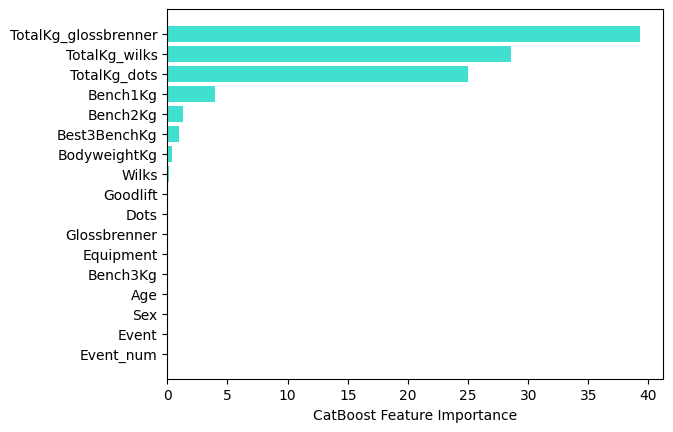

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sorted_feature_importance = cb_model.feature_importances_.argsort()
plt.barh(np.array(list(X))[sorted_feature_importance],
        cb_model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")